<h1><center>Module 2 project</center><br>
<center>Open Food Facts Analysis</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
pd.set_option('max_colwidth', 200)
pd.set_option("display.max_rows", 200)
sns.set()
def autolabel(rects, xpos='center'): 
    for rect in rects:
        width = rect.get_width()
        ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + rect.get_height()/2.,
                '%i' % width,
                ha='center', va='center', color='white')
def autolabelx(rects, xpos='center'): 
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height/2.,
                '%i' % height,
                ha='center', va='center', color='white')
%matplotlib inline

# A. Importing and cleaning the data
_Exercice :_<br>
You will start by downloading the data from the Kaggle link provided and import it into
pandas. You will then need to clean this data using the tools and methods covered in this
course. There is not just one correct way to do this. Several solutions will be accepted as
long as you demonstrate that you have sufficiently cleaned the data. This includes, of
course, dealing with missing values, standardising entries and text data, bringing text or
time entries in a common format, dealing with duplicates or incorrect values or getting
certain data in more useful formats.<br><br>
_Solution :_<br>
We will first download data from the provided url, unzip it in the data directory, and load it in a dataset.

In [2]:
#!mkdir -p data
#!curl -o data/world-food-facts.zip https://www.kaggle.com/openfoodfacts/world-food-facts/download

In [3]:
#!unzip -o data/world-food-facts.zip -d data

We have added the parameter "low_memory=False" to read_csv call to avoid the following warning : <br>

*DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)*<br>

In [4]:
data = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

There is more than 350 000 product in this dataset, and 163 Columns!

In [5]:
data.shape

(356027, 163)

With 163 columns in the dataset, it's difficult to analyze them all. We have to choose a subset of them. This task depends on informations we need to answer to our data analysis questions.<br>
Before going deeply in this task, we will first check the number (and percentage) of null values in each column. The more Null values we have in a column, the more it's useless for analysis.<br><br>
### Handling null values
The dataframe "data_nulls" dataset will store this information. Data is sorted by percentage of null values.

In [6]:
# we calculates here the number and percentage  of nan values and give them a meaningfull names : 'PercentageOfNullValues', 'NumberOfNullValues'.
# the mean will calculates the percentage of null values, and sum their number because False=0(not null) and True=1(null).
# there is 163 columns and 2 columns in this dataset. So, it's better to transpose it to better display it.
data_nulls = data.isnull().agg(['mean','sum'], axis=0).set_index(pd.Index(['PercentageOfNullValues', 'NumberOfNullValues'])).T
# we then calculates the number of non null values and multiplies PercentageOfNullValues by 100 to better display the percentage values.
data_nulls['NumberOfNonNullValues']=data.shape[0]-data_nulls.NumberOfNullValues
data_nulls['PercentageOfNullValues'] = 100*data_nulls['PercentageOfNullValues']
# and finally, sort the rows by percentage of null values
data_nulls = data_nulls.sort_values(['PercentageOfNullValues'])
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues
last_modified_t,0.000000,0.0,356027.0
last_modified_datetime,0.000000,0.0,356027.0
creator,0.000843,3.0,356024.0
created_t,0.000843,3.0,356024.0
created_datetime,0.002809,10.0,356017.0
code,0.007303,26.0,356001.0
url,0.007303,26.0,356001.0
states,0.014606,52.0,355975.0
states_en,0.014606,52.0,355975.0
states_tags,0.014606,52.0,355975.0


This list is very long. 

We will summarize this information with a histogram chart using 10 bins (0%-10%, 10%-20%, ..., 90%-100%)

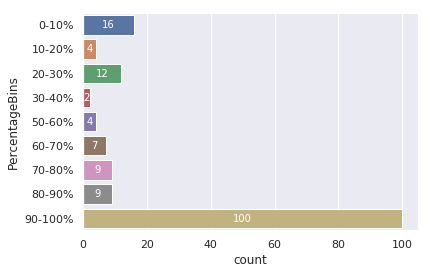

In [7]:
data_nulls ['PercentageBins'] = data_nulls['PercentageOfNullValues'].apply(lambda x: int(10*((x if x<100 else 99)//10))).apply(lambda x: f'{x}-{x+10}%')
ax = sns.countplot(y="PercentageBins", data=data_nulls.reset_index().sort_values("PercentageBins"))
autolabel(ax.patches)

This chart shows that there is a lot of columns with a high number of null values.<br>
We will remove columns with more than 75% of null values (columns starting from image_url in the dataset data_nulls above). 

In [8]:
columns_to_remove = data_nulls.loc[data_nulls.PercentageOfNullValues >= 75.].index.values
columns_to_remove

array(['image_url', 'image_small_url', 'purchase_places', 'labels_en',
       'labels_tags', 'labels', 'generic_name', 'stores',
       'manufacturing_places', 'manufacturing_places_tags', 'allergens',
       'emb_codes', 'emb_codes_tags', 'traces', 'traces_en',
       'traces_tags', 'origins', 'origins_tags', 'potassium_100g',
       'polyunsaturated-fat_100g', 'monounsaturated-fat_100g',
       'cities_tags', 'first_packaging_code_geo',
       'ingredients_that_may_be_from_palm_oil_tags', 'vitamin-pp_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-d_100g',
       'vitamin-b6_100g', 'ingredients_from_palm_oil_tags',
       'magnesium_100g', 'phosphorus_100g', 'vitamin-b12_100g',
       'vitamin-b9_100g', 'alcohol_100g', 'zinc_100g',
       'fruits-vegetables-nuts_100g', 'folates_100g',
       'pantothenic-acid_100g', 'copper_100g', 'manganese_100g',
       'vitamin-e_100g', 'cocoa_100g', 'selenium_100g',
       'omega-3-fat_100g', 'vitamin-k_100g', 'energy-from-fat_100g',

In [9]:
data.drop(columns_to_remove, axis='columns', inplace=True)
data_nulls.drop(columns_to_remove, inplace=True)

In [10]:
data.shape

(356027, 52)

The number of remaining columns is now 52 columns.

In [11]:
data_nulls=data_nulls.sort_values('PercentageOfNullValues')
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,PercentageBins
last_modified_t,0.000000,0.0,356027.0,0-10%
last_modified_datetime,0.000000,0.0,356027.0,0-10%
creator,0.000843,3.0,356024.0,0-10%
created_t,0.000843,3.0,356024.0,0-10%
created_datetime,0.002809,10.0,356017.0,0-10%
code,0.007303,26.0,356001.0,0-10%
url,0.007303,26.0,356001.0,0-10%
states,0.014606,52.0,355975.0,0-10%
states_en,0.014606,52.0,355975.0,0-10%
states_tags,0.014606,52.0,355975.0,0-10%


In order to handle missing values, we will study the last 10 columns to see how we can fill missing values.
Except quantity column, the nine remaining columns are categorical.<br>

Here is the list of columns to study :

In [12]:
data_nulls.loc['pnns_groups_2':,:].index

Index(['pnns_groups_2', 'pnns_groups_1', 'quantity', 'categories_en',
       'categories', 'categories_tags', 'main_category', 'main_category_en',
       'packaging', 'packaging_tags'],
      dtype='object')

In [13]:
last_columns = ['pnns_groups_2', 'pnns_groups_1', 'categories_en','categories', 'categories_tags', 'main_category', 'main_category_en','packaging', 'packaging_tags']

- Columns "pnns_groups_2" and "pnns_groups_1"<br>
The following commands will show the histogram of these columns.

In [14]:
data['pnns_groups_2'].value_counts(dropna=True)

unknown                             43603
Non-sugared beverages                7290
One-dish meals                       6495
Sweets                               5685
Biscuits and cakes                   5511
Cereals                              4686
Cheese                               4564
Dressings and sauces                 4522
Milk and yogurt                      4251
Processed meat                       3835
Alcoholic beverages                  3609
Chocolate products                   3554
Vegetables                           3159
Fish and seafood                     3070
Sweetened beverages                  2983
Fats                                 2600
Appetizers                           2464
Fruits                               2419
Fruit juices                         2349
Bread                                2337
Meat                                 1950
Breakfast cereals                    1760
Legumes                              1098
vegetables                        

In [15]:
data['pnns_groups_1'].value_counts(dropna=True)

unknown                    43603
Sugary snacks              14750
Beverages                  13476
Milk and dairy products    10733
Cereals and potatoes       10078
Fish Meat Eggs              9473
Composite foods             7972
Fat and sauces              7122
Fruits and vegetables       6763
Salty snacks                3299
fruits-and-vegetables       1098
sugary-snacks                619
cereals-and-potatoes          19
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

for these two columns, there is a pnn group "unknown". So, we can replace null values with this 'unknown' value.

In [16]:
data['pnns_groups_1'].fillna(value='unknown', inplace=True)
data['pnns_groups_2'].fillna(value='unknown', inplace=True)

- Columns "categories", "categories_en", "categories_tags", "main_category" and "main_category_en"<br>
The first top 10 values of these columns is displayed bellow :

In [17]:
for c in ['categories', 'categories_en', 'categories_tags','main_category', 'main_category_en']:
    print('########################')
    print(f'Column {c} : first 10 values count:')
    print('########################')
    print(data[c].value_counts(dropna=True)[:10])

########################
Column categories : first 10 values count:
########################
en:beverages                                                       2368
en:fats                                                             715
Ketchup                                                             387
Snacks sucrés,Biscuits et gâteaux,Biscuits                          315
en:milks                                                            311
Biscuits                                                            303
Snacks sucrés,Chocolats,Chocolats noirs                             297
en:non-sugared-beverages, en:beverages                              247
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat     246
Viandes,Charcuteries,Jambons,Jambons blancs                         228
Name: categories, dtype: int64
########################
Column categories_en : first 10 values count:
########################
Beverages,Non-sugared beverages                             

The number of rows containing null values is the following :

In [18]:
data[['categories', 'categories_en', 'categories_tags','main_category', 'main_category_en']].dropna().shape

(103249, 5)

Here is the first rows of this dataset 

In [19]:
data[['categories', 'categories_en', 'categories_tags','main_category', 'main_category_en']].dropna().head(20)

,categories,categories_en,categories_tags,main_category,main_category_en
47,Filet de bœuf,fr:Filet-de-boeuf,fr:filet-de-boeuf,fr:filet-de-boeuf,fr:Filet-de-boeuf
176,Légumes-feuilles,"Plant-based foods and beverages,Plant-based foods,Fresh foods,Fruits and vegetables based foods,Fresh plant-based foods,Vegetables based foods,Fresh vegetables,Leaf vegetables","en:plant-based-foods-and-beverages,en:plant-based-foods,en:fresh-foods,en:fruits-and-vegetables-based-foods,en:fresh-plant-based-foods,en:vegetables-based-foods,en:fresh-vegetables,en:leaf-vegetables",en:plant-based-foods-and-beverages,Plant-based foods and beverages
177,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","Sugary snacks,Biscuits and cakes,Pastries","en:sugary-snacks,en:biscuits-and-cakes,en:pastries",en:sugary-snacks,Sugary snacks
179,"Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Breads","Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Breads","en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads",en:plant-based-foods-and-beverages,Plant-based foods and beverages
182,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","Sugary snacks,Biscuits and cakes,Pastries","en:sugary-snacks,en:biscuits-and-cakes,en:pastries",en:sugary-snacks,Sugary snacks
183,Boulange,fr:Boulange,fr:boulange,fr:boulange,fr:Boulange
184,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes","Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Legumes and their products,Legumes,Seeds,Legume seeds,Pulses,Lentils,Green lentils","en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:lentils,en:green-lentils",en:plant-based-foods-and-beverages,Plant-based foods and beverages
185,"Boissons,Boissons gazeuses,Sodas,Boissons sucrées,Root Beers","Beverages,Carbonated drinks,Sodas,Sugared beverages,fr:Root-beers","en:beverages,en:carbonated-drinks,en:sodas,en:sugared-beverages,fr:root-beers",en:beverages,Beverages
186,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","Sugary snacks,Biscuits and cakes,Biscuits,fr:Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,fr:sables",en:sugary-snacks,Sugary snacks
187,Quiches lorraines,"Meals,Pizzas pies and quiches,Quiches,fr:Quiches lorraines","en:meals,en:pizzas-pies-and-quiches,en:quiches,fr:quiches-lorraines",en:meals,Meals


We can see that :
  - there is more than 100 000 non null values for these columns
  - the categories_tags contains the category prefixed by the language abbreviation (en, fr, ...)
  - The column categories_tags can replace the two other columns (categories_en and categories)
  - The column main_category is the main category from categories_tags list
  
So, a solution to handle null values for these columns is :
  - drop the columns  categories and categories_en
  - drop the column main_category_en
  - replace null values with 'en:unknown' in these columns

In [20]:
data.drop(['categories','categories_en','main_category_en'], axis='columns', inplace=True)
data_nulls.drop(['categories','categories_en','main_category_en'], inplace=True)
data['categories_tags'].fillna(value='en:unknown', inplace=True)
data['main_category'].fillna(value='en:unknown', inplace=True)
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,PercentageBins
last_modified_t,0.000000,0.0,356027.0,0-10%
last_modified_datetime,0.000000,0.0,356027.0,0-10%
creator,0.000843,3.0,356024.0,0-10%
created_t,0.000843,3.0,356024.0,0-10%
created_datetime,0.002809,10.0,356017.0,0-10%
code,0.007303,26.0,356001.0,0-10%
url,0.007303,26.0,356001.0,0-10%
states,0.014606,52.0,355975.0,0-10%
states_en,0.014606,52.0,355975.0,0-10%
states_tags,0.014606,52.0,355975.0,0-10%


- Columns 'packaging' and 'packaging_tags' :<br>
The first top 10 values of these columns is displayed bellow :

In [21]:
for c in ['packaging', 'packaging_tags']:
    print('########################')
    print(f'Column {c} : first 10 values count:')
    print('########################')
    print(data[c].value_counts(dropna=True)[:10])

########################
Column packaging : first 10 values count:
########################
Sachet,Plastique       2633
Carton                 2212
Plastique              2120
Bouteille,Verre        1769
sachet,plastique       1455
Kunststoff             1417
Conserve               1378
Bocal,Verre            1236
Bouteille,Plastique    1192
barquette,plastique    1017
Name: packaging, dtype: int64
########################
Column packaging_tags : first 10 values count:
########################
sachet,plastique       5050
plastique              3048
carton                 3034
barquette,plastique    2260
bouteille,verre        2139
bouteille,plastique    1823
conserve               1764
bocal,verre            1685
kunststoff             1421
carton,plastique       1232
Name: packaging_tags, dtype: int64


In [22]:
data[['packaging', 'packaging_tags']].dropna().shape

(89957, 2)

In [23]:
100*(1-data[['packaging', 'packaging_tags']].dropna().shape[0]/data[['packaging', 'packaging_tags']].shape[0])

74.73309608540926

There is about 90 000 rows with non null values. 75% of data contains at least one null value.
So, it's more appropriate to replace null values with an 'unknown' value.<br>
It seems like these two columns contains the same information. If so, we can drop one of them to avoid redunduncy. Let's display the first 20 rows :

In [24]:
data[['packaging', 'packaging_tags']].dropna().head(20)

,packaging,packaging_tags
47,plastique,plastique
176,Frais,frais
177,Frais,frais
179,"Paper,plastic film","paper,plastic-film"
182,Frais,frais
183,"Frais,plastique","frais,plastique"
184,Sachet plastique,sachet-plastique
185,"Canette,Métal","canette,metal"
186,"Carton,boîte","carton,boite"
187,Frai,frai


These 20 first values confirms our intuition. "packaging" column contains cleaner values. 
In the following section, we will try to verify if our first intuition is correct. We have to transform these columns and compare them.
Here is some problematic examples :

In [25]:
data.iloc[[179, 185, 287, 597, 19715, 26997]][['packaging', 'packaging_tags']]

,packaging,packaging_tags
179,"Paper,plastic film","paper,plastic-film"
185,"Canette,Métal","canette,metal"
287,film - plastic,film-plastic
597,"tray - plastic, film - plastic","tray-plastic,film-plastic"
19715,"fr:conserve,en:Green dot,en:Triman,en:Boite metal","fr-conserve,en-green-dot,en-triman,en-boite-metal"
26997,10% PCW,10-pcw


Let's begin with the following transformations :
- replace null values with 'nan'
- lowercase all letters
- replace '-', ',', '%', ... by space
- replace multiple successive spaces with only one
- remove accents : è, à, ô ...

In [26]:
def transform(s):
    s = s.fillna('nan')
    s = s.str.lower()
    s = s.str.replace('\-|\,|\%|\:|\.|\(|\)|\'|\/|\+|\-|\!|\_',' ')
    s = s.str.replace('\s\s+',' ')
    s = s.str.strip()
    s = s.str.normalize('NFKD').str.encode('ascii', errors='ignore')
    return s

The following is the transformation result of our first examples :

In [27]:
 transform(data.packaging).iloc[[179, 185, 287, 597, 19715, 26997]]

179                                     b'paper plastic film'
185                                          b'canette metal'
287                                           b'film plastic'
597                              b'tray plastic film plastic'
19715    b'fr conserve en green dot en triman en boite metal'
26997                                               b'10 pcw'
Name: packaging, dtype: object

With these transformations, there is only 245 row where the two columns are not identical after transformation<br>

In [28]:
diff = transform(data.packaging) == transform(data.packaging_tags)
diff.value_counts()

True     355782
False       245
dtype: int64

The list bellow shows the first 20 values of rows which differs

In [29]:
data[~diff][['packaging', 'packaging_tags']].head(20)

,packaging,packaging_tags
139832,Braunglaß,braunglass
176649,"237×140,Finnpack Eco 08-107-34,флоу-пак","237-140,finnpack-eco-08-107-34,флоу-пак"
178127,NaN,n-a
178210,Braunglaß,braunglass
178679,"Carton$Boîte,Frais,Boîte,Carton","carton-boite,frais,boite,carton"
178979,"Frais,Décongelé,Plateau & couvercle plastique moulé,Etiquettes papier","frais,decongele,plateau-couvercle-plastique-moule,etiquettes-papier"
179173,"Conserva,#40 FE","conserva,40-fe"
179928,"Bouteille,Plastique,bouteille & bouchon plastique","bouteille,plastique,bouteille-bouchon-plastique"
180772,Weißblech,weissblech
180982,"98+33×72×71,81,ELOPAK,OAL279","98-33-72-71,81,elopak,oal279"


We can see that theses 2 columns contains almost the same information, even for the remaining columns.<br>
Conclusion  : We can drop the colum packaging_tags and replace missing values with unknown.

In [30]:
data.drop(['packaging_tags'], axis='columns', inplace=True)
data_nulls.drop(['packaging_tags'], inplace=True)
data['packaging'].fillna(value='unknown', inplace=True)
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,PercentageBins
last_modified_t,0.000000,0.0,356027.0,0-10%
last_modified_datetime,0.000000,0.0,356027.0,0-10%
creator,0.000843,3.0,356024.0,0-10%
created_t,0.000843,3.0,356024.0,0-10%
created_datetime,0.002809,10.0,356017.0,0-10%
code,0.007303,26.0,356001.0,0-10%
url,0.007303,26.0,356001.0,0-10%
states,0.014606,52.0,355975.0,0-10%
states_en,0.014606,52.0,355975.0,0-10%
states_tags,0.014606,52.0,355975.0,0-10%


We will now study the last column in our list : quantity column.<br>
it's a numerical column. Here is he first 20 not null values

In [31]:
data.quantity.dropna()[:20]

0                     1kg
46                  250ml
47                2.46 kg
48                   230g
51            60 capsules
155                  500g
156                    2l
176              0.980 kg
177              1.150 kg
178                  170g
181                   45g
182              1.200 kg
183    1.008 kg / 12 pain
184                 1 kg 
185               33 cl e
186                  1 kg
187              1 400 kg
188               1250 kg
189                46,7 g
191                  75 g
Name: quantity, dtype: object

In this column, the value and unit of measure are stored in the same place. It's more appropriate to separate them. In addition, the format of numbers is not the same.<br>
This task is very difficult. There is a library, called ingreedy, which parses this type of data.<br>
To install this library, the command to use is : **pip install ingreedypy**<br>
Let's parse this column with this library.
 

In [32]:
from ingreedypy import Ingreedy
ingreedy = Ingreedy()
def parse_col(val):
    try:
        ret = ingreedy.parse(val)
    except:
        ret = np.nan
    return ret

In [33]:
df = data.quantity.dropna().apply(lambda x: parse_col(x))

In [34]:
df.isnull().value_counts()

True     101885
False     17400
Name: quantity, dtype: int64

The library has succeeded to parse only 17400 value.
We will not investigate further because the problem is complex for the purpose of this project.
We will simply drop this column.

In [35]:
data.drop(['quantity'], axis='columns', inplace=True)
data_nulls.drop(['quantity'], inplace=True)
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,PercentageBins
last_modified_t,0.000000,0.0,356027.0,0-10%
last_modified_datetime,0.000000,0.0,356027.0,0-10%
creator,0.000843,3.0,356024.0,0-10%
created_t,0.000843,3.0,356024.0,0-10%
created_datetime,0.002809,10.0,356017.0,0-10%
code,0.007303,26.0,356001.0,0-10%
url,0.007303,26.0,356001.0,0-10%
states,0.014606,52.0,355975.0,0-10%
states_en,0.014606,52.0,355975.0,0-10%
states_tags,0.014606,52.0,355975.0,0-10%


Because there is a lot of columns in this dataset. The adopted strategy for the remaining columns is :<br>
  - For non-numeric columns : replace null values with 'unknown'
  - Drop duplicate columns<br>
<br>

Here is the list of non-numeric columns :

In [36]:
data.select_dtypes(exclude=['float64']).head(1).T.index

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'packaging', 'brands', 'brands_tags', 'categories_tags', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'serving_size',
       'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category'],
      dtype='object')

In [37]:
# dropping duplicate columns
data.drop(['brands', 'countries','countries_en','additives_tags','additives_en','serving_size'], axis='columns', inplace=True)
data_nulls.drop(['brands', 'countries','countries_en','additives_tags','additives_en','serving_size'], inplace=True)
#replacing null vlaues with "unknown"
for c in ['product_name','brands_tags','countries_tags','nutrition_grade_fr']:
  data[c].fillna(value='unknown', inplace=True)
for c in ['additives']:
  data[c].fillna(value='[]', inplace=True)
for c in ['ingredients_text']:
  data[c].fillna(value='', inplace=True)

Let's re-calculate the null values percentge and count after these transformations

In [38]:
data_nulls = data.isnull().agg(['mean','sum'], axis=0).set_index(pd.Index(['PercentageOfNullValues', 'NumberOfNullValues'])).T
data_nulls['NumberOfNonNullValues']=data.shape[0]-data_nulls.NumberOfNullValues
data_nulls['PercentageOfNullValues'] = 100*data_nulls['PercentageOfNullValues']
data_nulls['dtypes'] = data.dtypes
data_nulls = data_nulls.sort_values(['PercentageOfNullValues'])
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,dtypes
brands_tags,0.000000,0.0,356027.0,object
nutrition_grade_fr,0.000000,0.0,356027.0,object
additives,0.000000,0.0,356027.0,object
main_category,0.000000,0.0,356027.0,object
ingredients_text,0.000000,0.0,356027.0,object
countries_tags,0.000000,0.0,356027.0,object
categories_tags,0.000000,0.0,356027.0,object
pnns_groups_1,0.000000,0.0,356027.0,object
pnns_groups_2,0.000000,0.0,356027.0,object
product_name,0.000000,0.0,356027.0,object


Finally, we will drop rows with less than 100 null values.

In [39]:
data.dropna(subset=data_nulls[data_nulls.NumberOfNullValues<=100].index.values, inplace=True)

Let's check if there is duplicated rows

In [40]:
data.duplicated().sum()

0

There is no duplicate row.

In [41]:
data.drop_duplicates(inplace=True)

The final list of null values report is the following :

In [42]:
data_nulls = data.isnull().agg(['mean','sum'], axis=0).set_index(pd.Index(['PercentageOfNullValues', 'NumberOfNullValues'])).T
data_nulls['NumberOfNonNullValues']=data.shape[0]-data_nulls.NumberOfNullValues
data_nulls['PercentageOfNullValues'] = 100*data_nulls['PercentageOfNullValues']
data_nulls['dtypes'] = data.dtypes
data_nulls = data_nulls.sort_values(['PercentageOfNullValues'])
data_nulls

,PercentageOfNullValues,NumberOfNullValues,NumberOfNonNullValues,dtypes
code,0.000000,0.0,355971.0,object
main_category,0.000000,0.0,355971.0,object
states_en,0.000000,0.0,355971.0,object
states_tags,0.000000,0.0,355971.0,object
pnns_groups_2,0.000000,0.0,355971.0,object
pnns_groups_1,0.000000,0.0,355971.0,object
nutrition_grade_fr,0.000000,0.0,355971.0,object
additives,0.000000,0.0,355971.0,object
ingredients_text,0.000000,0.0,355971.0,object
countries_tags,0.000000,0.0,355971.0,object


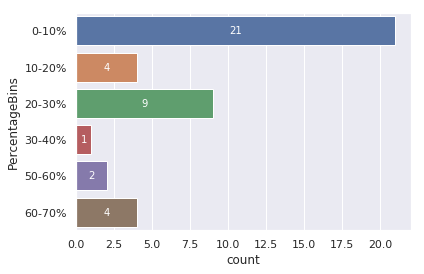

In [43]:
data_nulls ['PercentageBins'] = data_nulls['PercentageOfNullValues'].apply(lambda x: int(10*((x if x<100 else 99)//10))).apply(lambda x: f'{x}-{x+10}%')
ax = sns.countplot(y="PercentageBins", data=data_nulls.reset_index().sort_values("PercentageBins"))
autolabel(ax.patches)

In [44]:
data.shape

(355971, 41)

Now, the only columns that contains nulls are numerical columns. 13 of them have a percentage bellow 30% and 7 of them between 30% and 70%.

- If we need to analyze only categorical data, we will remove theses numerical columns and we will have more than 300 000 rows in our dataset
- If we need to analyze macronutrient groups like carbohydrates, protein and fats, we will lose 30% of rows.
- If we need to analyze other aspects like cholesterol,fiber, vitamins, iron, .... We will lose 70% od rows

For these 3 scenarios, the following commands will create the appropriate dataset :

In [45]:
data1 = data[data_nulls[data_nulls.PercentageOfNullValues<=1].index.values].dropna()
data1.shape

(355971, 21)

In [46]:
data2 = data[data_nulls[data_nulls.PercentageOfNullValues<=30].index.values].dropna()
data2.shape

(228842, 34)

In [47]:
data3 = data.dropna()
data3.shape

(126114, 41)

### Standardising entries

In this section, we will study two columns : countries_tags (non-numeric) and fiber_100g (numeric).<br>
- countries_tags column<br>

To check if there is incorrect data, we use the pycountry library. The function pycountry.countries.lookup returns None if the country does'nt exists.<br>
Another library, gostlate, helps to translate country names to english using google translate api. But, this google api usage is propiriatary and free usage is limited.  We have added it here to illustrate how we can use external libraries to translate data.

In [48]:
data.countries_tags.value_counts().index

Index(['en:united-states', 'en:france', 'en:switzerland', 'en:germany',
       'en:spain', 'en:united-kingdom', 'en:belgium', 'en:australia',
       'en:russia', 'en:france,en:switzerland',
       ...
       'en:lithuania,en:united-kingdom', 'en:belarus,en:czech-republic',
       'en:bulgaria,en:hungary,en:romania',
       'en:germany,en:united-arab-emirates',
       'en:hungary,en:serbia,en:switzerland',
       'en:belgium,en:france,en:portugal,en:switzerland',
       'en:european-union,en:switzerland',
       'en:denmark,en:finland,en:greece,en:norway,en:portugal,en:sweden',
       'other-العراق', 'en:france,en:sint-maarten'],
      dtype='object', length=779)

In [49]:
#!pip install pycountry
import goslate
import pycountry
# this function translates a text to english
def translate_text(text):
    gs = goslate.Goslate()
    translatedText = gs.translate(text,'en')
    return translatedText

# this function will check if a country is valid
def valid_country(c):
    try:
        # try to check if the current name is valid
        rval = pycountry.countries.lookup(c).name
        return True
    except:
        try:
            # when the name of the country is not valid, try to translate it to english
            # the dictionary translated_countries contains the manually translated names of countries
            # this dictionary is contructed later in the notebook 
            rval = pycountry.countries.lookup(translated_countries[c]).name
            return True
        except:
            pass
    return False

# this function standardize the name of the country
# it removes spaces from left and right, replaces - by space
# and removes the language code from the name
# example : "en:United-States" will be translated to "united states"
def extract_name(c):
    if ':' in c:
        return c[3:].strip().replace('-',' ')
    else:
        return c.strip().replace('-',' ')
    
# this function will transform a comma-separated list of countries, to a list of standardized names of countries.
def list_countries(text):
    countries = [ extract_name(c) for c in text.split(',')]
    return countries;
            

this is an example of usage of "pycountry.countries.lookup" function

In [50]:
pycountry.countries.lookup('en:united states'[3:])

Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')

the variable list_of_countries contains the list of all countries in the dataset.<br>
The steps to construct this list are :
* Get a an nparray of comma-separated list of countries in the dataset data ("data.countries_tags.value_counts().index.values")
* Transform it to a list of lists of standardized countries
* Flatten it using np.sum() function. The idea behind this is that adding 2 lists in python will simply concatenate them.
* Return a unique list of countries using np.unique() function.

In [51]:
list_of_countries = np.unique(np.sum([list_countries(l) for l in data.countries_tags.value_counts().index.values]))
list_of_countries

array(['afghanistan', 'albania', 'alemania', 'algeria', 'allemagne',
       'andorra', 'angleterre', 'angola', 'ap', 'argentina', 'armenia',
       'aruba', 'australia', 'austria', 'azerbaijan', 'bahrain',
       'bangladesh', 'barbados', 'belarus', 'belgie', 'belgien',
       'belgiqu', 'belgium', 'bolivia', 'bosnia and herzegovina',
       'bourgogne aube nogent sur seine', 'brazil', 'brunei', 'bulgaria',
       'burkina faso', 'burundi', 'cambodia', 'cameroon', 'canada',
       'central african republic', 'chad', 'chile', 'china', 'colombia',
       'cook islands', 'costa rica', 'cote d ivoire', 'croatia', 'cuba',
       'cyprus', 'czech republic', 'danemark',
       'democratic republic of the congo', 'demonte italie', 'denmark',
       'deutschland', 'dominican republic', 'ecosse', 'ecuador', 'egypt',
       'el salvador', 'estonia', 'ethiopia', 'european union', 'fiji',
       'finland', 'france', 'frankreich', 'frankrijk', 'french guiana',
       'french polynesia', 'gabon', 'ge

The dictionary bellow contains the list of non valid country names. This output will be copied later to translate manually non valid country names.

In [52]:
{c:'' for c in list_of_countries if not valid_country(c)}

{'alemania': '',
 'allemagne': '',
 'angleterre': '',
 'ap': '',
 'belgie': '',
 'belgien': '',
 'belgiqu': '',
 'bourgogne aube nogent sur seine': '',
 'brunei': '',
 'cote d ivoire': '',
 'danemark': '',
 'democratic republic of the congo': '',
 'demonte italie': '',
 'deutschland': '',
 'ecosse': '',
 'european union': '',
 'frankreich': '',
 'frankrijk': '',
 'global market': '',
 'grande bretagne': '',
 'griekenland': '',
 'guinea bissau': '',
 'iran': '',
 'irland': '',
 'macau': '',
 'marseille 5': '',
 'mauricio': '',
 'nederland': '',
 'other japon': '',
 'other turquie': '',
 'other العراق': '',
 'other 日本': '',
 'palestinian territories': '',
 'puyricard': '',
 'quebec': '',
 'reino unido': '',
 'republic of macedonia': '',
 'republique de chine': '',
 'reunion': '',
 'russia': '',
 'saint martin': '',
 'schweiz': '',
 'scotland': '',
 'sint maarten': '',
 'south korea': '',
 'soviet union': '',
 'spanien': '',
 'spanje': '',
 'state of palestine': '',
 'syria': '',
 'szczec

In [53]:
translated_countries = {'alemania': 'germany',
 'allemagne': 'germany',
 'angleterre': 'united kingdom',
 'ap': 'ap',
 'belgie': 'belgium',
 'belgien': 'belgium',
 'belgiqu': 'belgium',
 'bourgogne aube nogent sur seine': 'france',
 'brunei': 'Brunei Darussalam',
 'cote d ivoire': 'Côte d\'ivoire',
 'danemark': 'denmark',
 'democratic republic of the congo': 'congo',
 'demonte italie': 'italy',
 'deutschland': 'germany',
 'ecosse': 'united kingdom',
 'european union': 'european union',
 'frankreich': 'france',
 'frankrijk': 'france',
 'global market': 'world',
 'grande bretagne': 'united kingdom',
 'griekenland': 'greece',
 'guinea bissau': 'guinea-bissau',
 'iran': 'Iran',
 'irland': 'ireland',
 'macau': 'macao',
 'marseille 5': 'france',
 'mauricio': 'Mauritius',
 'nederland': 'netherlands',
 'other japon': 'japan',
 'other turquie': 'turkey',
 'other العراق': 'iraq',
 'other 日本': 'japan',
 'palestinian territories': 'palestine',
 'puyricard': 'france',
 'quebec': 'canada',
 'reino unido': 'united kingdom',
 'republic of macedonia': 'north macedonia',
 'republique de chine': 'china',
 'reunion': 'france',
 'russia': 'russian federation',
 'saint martin': 'france',
 'schweiz': 'switzerland',
 'scotland': 'united kingdom',
 'sint maarten': 'france',
 'south korea': 'Korea, Republic of',
 'soviet union': 'russian federation',
 'spanien': 'spain',
 'spanje': 'spain',
 'state of palestine': 'Palestine',
 'syria': 'syria',
 'szczecin': 'poland',
 'unknown': 'unknown',
 'world': 'world',
 'франция': 'france',
 'البحرين': 'bahrain',
 'السعودية': 'saudi arabia',
 'العراق': 'iraq',
 'المملكة المتحدة': 'united kingdom',
 'سلطنة عمان': 'oman',
 'भारत': 'india',
 'ព្រះរាជាណាចក្រកម្ពុជា': 'cambodia',
 '中华人民共和国': 'china',
 '日本': 'japan',
 '香港': 'hong kong'}

After this transformation, most of countries are now OK.

In [54]:
{c:'' for c in list_of_countries if not valid_country(c)}

{'ap': '',
 'european union': '',
 'global market': '',
 'iran': '',
 'palestinian territories': '',
 'state of palestine': '',
 'syria': '',
 'unknown': '',
 'world': ''}

The final step is to replace countries in the countries_tags with new ones.

In [55]:
def replace_country(c):
    if c in translated_countries.keys():
        return translated_countries[c]
    return c
def modify_countries(text):
    return ", ".join([replace_country(c) for c in list_countries(text)])
data['countries_tags'] = data.countries_tags.apply(modify_countries)


In [56]:
data.countries_tags.value_counts().index

Index(['united states', 'france', 'switzerland', 'germany', 'spain',
       'united kingdom', 'belgium', 'australia', 'russian federation',
       'france, switzerland',
       ...
       'belgium, denmark, france, poland',
       'india, united kingdom, united states', 'italy, netherlands, portugal',
       'germany, netherlands, spain, united kingdom', 'luxembourg, germany',
       'bosnia and herzegovina, croatia, north macedonia, serbia',
       'belgium, france, germany, greece, netherlands, spain',
       'belgium, denmark, france, germany, switzerland',
       'sweden, united states',
       'austria, denmark, france, germany, netherlands, spain, switzerland'],
      dtype='object', length=742)

### Handling datetime columns

There is 4 datetime columns :<br>
- created_t                                   
- created_datetime                            
- last_modified_t                             
- last_modified_datetime                      

In [57]:
data.loc[:,'created_t':'last_modified_datetime'].head()

,created_t,created_datetime,last_modified_t,last_modified_datetime
0,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z
1,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z
2,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z
3,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z
4,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z


We transform these columns to datetime type

In [58]:
data['created_datetime'] = pd.to_datetime(data['created_datetime'])
data['last_modified_datetime'] =pd.to_datetime(data['last_modified_datetime'])

For "*_t" data columns, they are in UNIX timestamp format. So, we will add unit='s' to parse them.

In [59]:
data['created_t'] = pd.to_datetime(data['created_t'], unit='s', utc=True)
data['last_modified_t'] = pd.to_datetime(data['last_modified_t'], unit='s', utc=True)

We can check now that these columns are of datatime type

In [60]:
data.dtypes[3:7]

created_t                 datetime64[ns, UTC]
created_datetime          datetime64[ns, UTC]
last_modified_t           datetime64[ns, UTC]
last_modified_datetime    datetime64[ns, UTC]
dtype: object

We can also check that the "*_t" and "*_datetime" columns are identical. So we can drop "*_t" columns

In [61]:
sum(data['created_t'] != data['created_datetime'] )

0

In [62]:
sum(data['last_modified_t'] != data['last_modified_datetime'] )

0

In [63]:
data.drop(['created_t', 'last_modified_t'], axis='columns', inplace=True)

In [64]:
data.dtypes

code                                                    object
url                                                     object
creator                                                 object
created_datetime                           datetime64[ns, UTC]
last_modified_datetime                     datetime64[ns, UTC]
product_name                                            object
packaging                                               object
brands_tags                                             object
categories_tags                                         object
countries_tags                                          object
ingredients_text                                        object
additives_n                                            float64
additives                                               object
ingredients_from_palm_oil_n                            float64
ingredients_that_may_be_from_palm_oil_n                float64
nutrition_grade_fr                                     

### Dealing with Outliers

For numeric columns, it's possible to use z-score (|z-score|>3) and 1.5 Inter Quartile Range methods to identify outliers.<br>
The main problem with these two methods is that they expects non highly skewed distributions, which is not he case for most of our columns.<br>
Other methods exists (like using autoencoders, isolation forests, dbscan, ...) but are out of scope of this project.<br>
In the following code, we create a dataset which resumes information about outliers in our columns using the first two methods.

In [65]:
# select numeric columns except nutrition-scores which will be studied later
data_numeric = data.select_dtypes(include ='float64').loc[:, :'iron_100g']
# calculate first quartile 
Q1 =  data_numeric.quantile(0.25).rename('q1')
# calculate third quartile 
Q3 = data_numeric.quantile(0.75).rename('q3')
# calculate Inter Range Quartile 
IQR = (Q3 - Q1).rename('iqr')
# calculate lower limit
M1 = (Q1 - 1.5*IQR).rename('min_whisker')
# calculate upper limit
M2 = (Q3 + 1.5*IQR).rename('max_whisker')
# Number of outilies using IRQ method.
N = ((data_numeric<M1) | (data_numeric>M2)).sum(axis=0).rename('iqr_outliers')
# Number of outilies using z-score method
Z = ( np.abs((data_numeric - data_numeric.mean())/data_numeric.std()) > 3 ).sum(axis=0).rename('zscore_outliers')
pd.concat([data_numeric.describe().loc[['min','max'], :].T.astype(int), Q1, Q3, IQR, M1, M2, N, Z], axis=1)

,min,max,q1,q3,iqr,min_whisker,max_whisker,iqr_outliers,zscore_outliers
additives_n,0,30,0.000000,3.000000,3.000000,-4.500000,7.500000,11010,4849
ingredients_from_palm_oil_n,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,6572,6572
ingredients_that_may_be_from_palm_oil_n,0,6,0.000000,0.000000,0.000000,0.000000,0.000000,14328,14328
energy_100g,0,231199,382.000000,1674.000000,1292.000000,-1556.000000,3612.000000,1283,124
fat_100g,0,15666666000,0.100000,20.000000,19.900000,-29.750000,49.850000,11874,1
saturated-fat_100g,0,550,0.000000,7.140000,7.140000,-10.710000,17.850000,19470,2984
trans-fat_100g,-3,369,0.000000,0.000000,0.000000,0.000000,0.000000,3070,555
cholesterol_100g,0,95,0.000000,0.020000,0.020000,-0.030000,0.050000,20943,8
carbohydrates_100g,0,15666666000,5.600000,57.580000,51.980000,-72.370000,135.550000,8,1
sugars_100g,-17,3520,1.200000,23.330000,22.130000,-31.995000,56.525000,18481,4031


There is also some "normal" or "natural" conditions that these columns must be met :<br>
- For "*_100g" columns : the values must be between 0 and 100. We can drop all values outside this range (4506 rows to drop).
- Value more than 10,000 are not common. We can remove them also (33 rows to drop).
- fat_100g + carbohydrates_100g + proteins_100g must be also in the range [0, 100] (1910 rows to drop)
- trans-fat_100g + saturated-fat_100g must be lower than fat_100g (52+352+249 rows to drop)

In [66]:
data_numeric[( (data_numeric > 10000) | (data_numeric < 0)).any(axis=1)].shape

(33, 18)

In [67]:
data_numeric[ (data_numeric.loc[:, 'fat_100g':] >= 100).any(axis=1) ].shape

(4506, 18)

In [68]:
data_numeric[ (data_numeric['fat_100g'] + data_numeric['carbohydrates_100g'] + data_numeric['proteins_100g'] > 100) ].shape

(1910, 18)

In [69]:
data[(data['trans-fat_100g'] > data['fat_100g'])].shape

(52, 39)

In [70]:
data[(data['saturated-fat_100g'] > data['fat_100g'])].shape

(352, 39)

In [71]:
data[(data['trans-fat_100g']+data['saturated-fat_100g'] > data['fat_100g'])].shape

(249, 39)

We drop these uncommon values and regenerate the report

In [72]:
data.drop(data_numeric[( (data_numeric > 10000) | (data_numeric < 0)).any(axis=1)].index, inplace=True)
data.drop(data[ (data.loc[:, 'fat_100g':] >= 100).any(axis=1) ].index, inplace=True)
data.drop(data[ (data['fat_100g'] + data['carbohydrates_100g'] + data['proteins_100g'] > 100) ].index, inplace=True)
data.drop(data[(data['saturated-fat_100g']+data['trans-fat_100g'] > data['fat_100g'])].index, inplace=True)
data.drop(data[(data['saturated-fat_100g']> data['fat_100g'])].index, inplace=True)
data.drop(data[(data['trans-fat_100g'] > data['fat_100g'])].index, inplace=True)
data_numeric = data.select_dtypes(include ='float64').loc[:, :'iron_100g']
Q1 =  data_numeric.quantile(0.25).rename('q1')
Q3 = data_numeric.quantile(0.75).rename('q3')
IQR = (Q3 - Q1).rename('iqr')
M1 = (Q1 - 1.5*IQR).rename('min_whisker')
M2 = (Q3 + 1.5*IQR).rename('max_whisker')
N = ((data_numeric<M1) | (data_numeric>M2)).sum(axis=0).rename('iqr_outliers')
Z = ( np.abs((data_numeric - data_numeric.mean())/data_numeric.std()) > 3 ).sum(axis=0).rename('zscore_outliers')
pd.concat([data_numeric.describe().loc[['min','max'], :].T.astype(int), Q1, Q3, IQR, M1, M2, N, Z], axis=1)

,min,max,q1,q3,iqr,min_whisker,max_whisker,iqr_outliers,zscore_outliers
additives_n,0,30,0.000,3.000000,3.000000,-4.500000,7.500000,10816,4798
ingredients_from_palm_oil_n,0,2,0.000,0.000000,0.000000,0.000000,0.000000,6548,6548
ingredients_that_may_be_from_palm_oil_n,0,6,0.000,0.000000,0.000000,0.000000,0.000000,14270,14270
energy_100g,0,9623,372.000,1648.000000,1276.000000,-1542.000000,3562.000000,438,727
fat_100g,0,99,0.100,20.000000,19.900000,-29.750000,49.850000,10112,5007
saturated-fat_100g,0,99,0.000,7.140000,7.140000,-10.710000,17.850000,18620,3107
trans-fat_100g,0,30,0.000,0.000000,0.000000,0.000000,0.000000,2908,1118
cholesterol_100g,0,95,0.000,0.022000,0.022000,-0.033000,0.055000,18207,9
carbohydrates_100g,0,99,5.600,57.000000,51.400000,-71.500000,134.100000,0,0
sugars_100g,0,99,1.200,22.430000,21.230000,-30.645000,54.275000,18261,5287


Before analyzing the report, we have to check distribution of values and see if they are highly skewed.

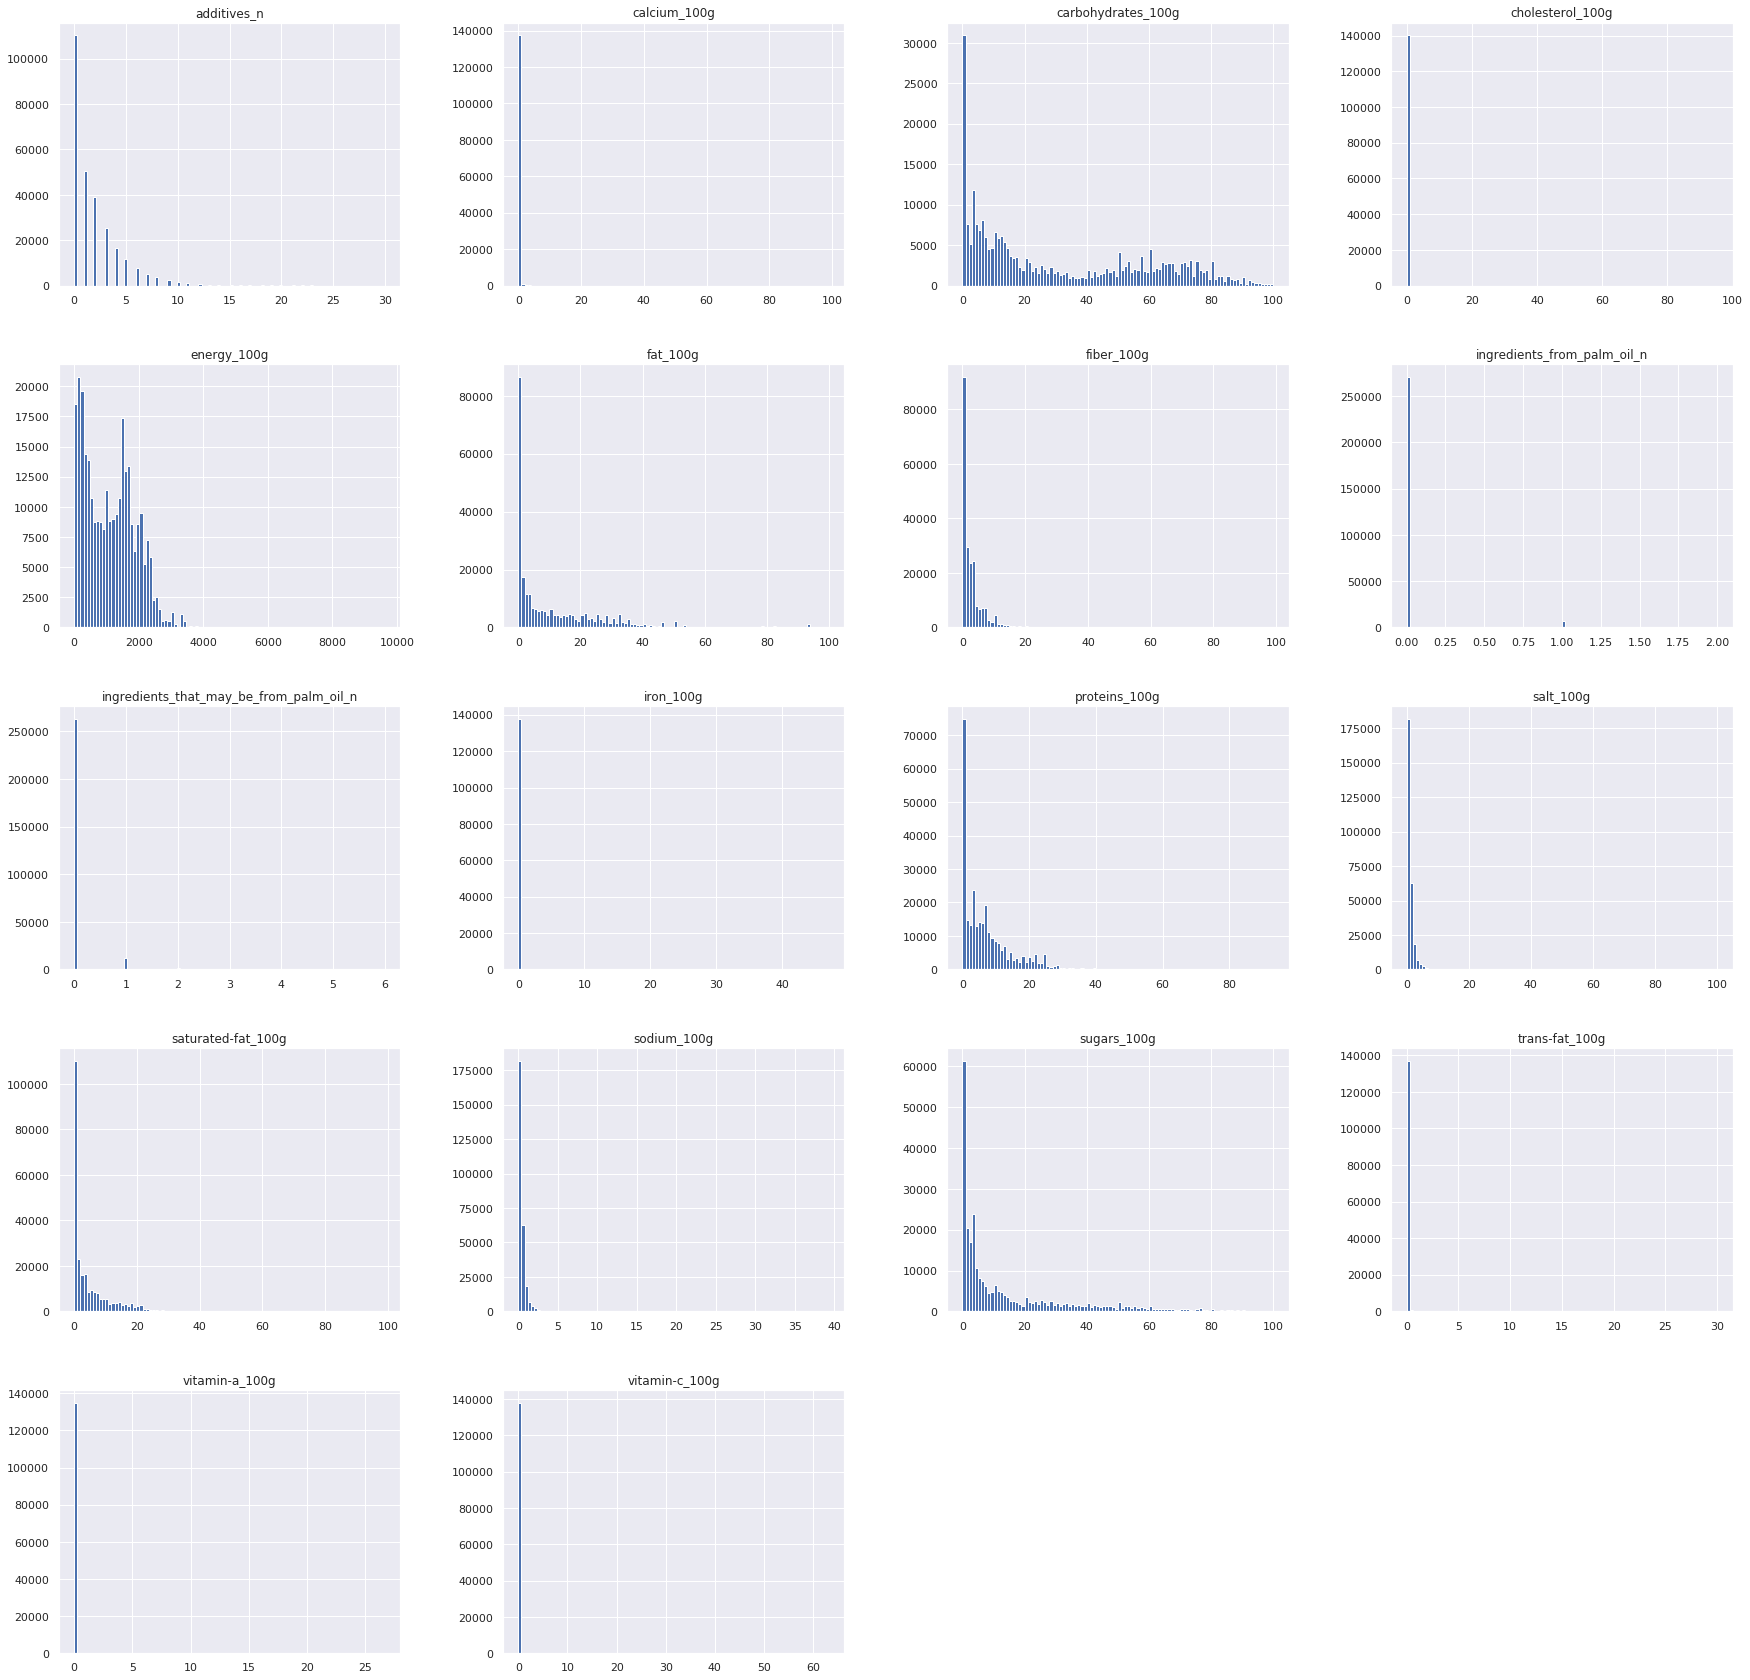

In [73]:
data_numeric.hist(bins=100, figsize=(30, 30), layout=(5, 4));

The data distribution of most of columns is very skewed, and contains a huge amount of rows with value 0. So, the rule of 1.5 Inter Quartile Range from the upper or lower quartile is not valid.
We will apply this rule only for the columns energy_100g and carbohydrates_100g.

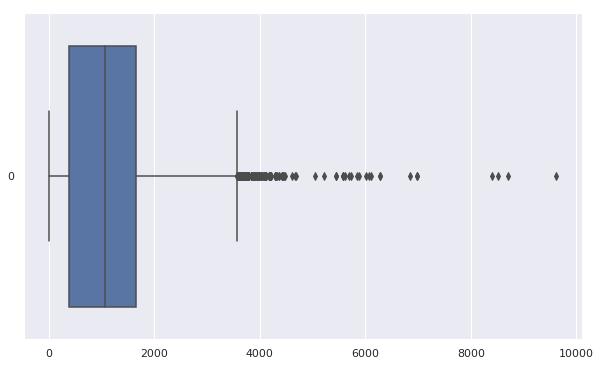

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_numeric.energy_100g ,orient='h' );

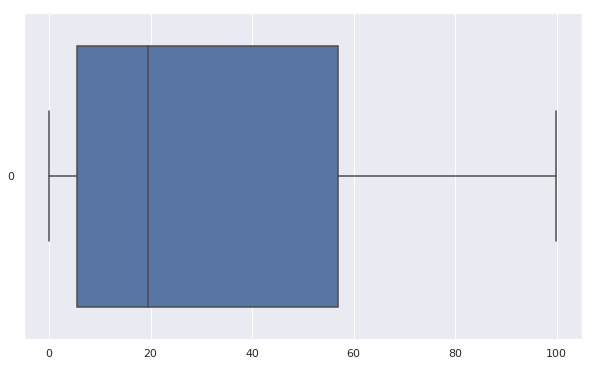

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_numeric.carbohydrates_100g ,orient='h' );

Only energy_100g contains outliers. We drop them and regenerate the report.

In [76]:
data.drop(data_numeric[((data_numeric.energy_100g<M1.energy_100g) | (data_numeric.energy_100g>M2.energy_100g))].index, inplace=True)
data_numeric = data.select_dtypes(include ='float64').loc[:, :'iron_100g']
Q1 =  data_numeric.quantile(0.25).rename('q1')
Q3 = data_numeric.quantile(0.75).rename('q3')
IQR = (Q3 - Q1).rename('iqr')
M1 = (Q1 - 1.5*IQR).rename('min_whisker')
M2 = (Q3 + 1.5*IQR).rename('max_whisker')
N = ((data_numeric<M1) | (data_numeric>M2)).sum(axis=0).rename('iqr_outliers')
Z = ( np.abs((data_numeric - data_numeric.mean())/data_numeric.std()) > 3 ).sum(axis=0).rename('zscore_outliers')
pd.concat([data_numeric.describe().loc[['min','max'], :].T.astype(int), Q1, Q3, IQR, M1, M2, N, Z], axis=1)

,min,max,q1,q3,iqr,min_whisker,max_whisker,iqr_outliers,zscore_outliers
additives_n,0,30,0.00000,3.000000,3.000000,-4.500000,7.500000,10814,4798
ingredients_from_palm_oil_n,0,2,0.00000,0.000000,0.000000,0.000000,0.000000,6546,6546
ingredients_that_may_be_from_palm_oil_n,0,6,0.00000,0.000000,0.000000,0.000000,0.000000,14263,14263
energy_100g,0,3556,372.00000,1644.000000,1272.000000,-1536.000000,3552.000000,5,430
fat_100g,0,99,0.10000,20.000000,19.900000,-29.750000,49.850000,9858,4848
saturated-fat_100g,0,99,0.00000,7.140000,7.140000,-10.710000,17.850000,18510,3205
trans-fat_100g,0,30,0.00000,0.000000,0.000000,0.000000,0.000000,2905,1125
cholesterol_100g,0,95,0.00000,0.022000,0.022000,-0.033000,0.055000,18205,9
carbohydrates_100g,0,99,5.63000,57.000000,51.370000,-71.425000,134.055000,0,0
sugars_100g,0,99,1.22000,22.500000,21.280000,-30.700000,54.420000,18157,5284


Because columns are very skewed, and maximum values are not so high, we choose to keep all the values for these columns.

##### nutrition-score-fr_100g and nutrition-score-uk_100g outliers
This is the definition of these two columns :<br>
- **nutrition-score-uk_100g** : nutrition score defined by the UK Food Standards Administration (FSA)
- **nutrition-score-fr_100g** : experimental nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)<br>

These scores are ranging from "negative fifteen" -15 (more nutritious) to "positive forty" +40 (less nutritious). (source https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en)<br>
the values must be betwwen -15 and +40 :

In [77]:
data['nutrition-score-fr_100g'].value_counts().sort_index()

-15.0        1
-14.0        5
-13.0       25
-12.0       51
-11.0      109
-10.0      198
-9.0       341
-8.0       649
-7.0      1079
-6.0      5457
-5.0      4699
-4.0      4952
-3.0      5717
-2.0      6994
-1.0      9971
 0.0     14612
 1.0     12796
 2.0     11994
 3.0      9263
 4.0      7396
 5.0      5904
 6.0      5495
 7.0      4957
 8.0      5884
 9.0      7067
 10.0     7554
 11.0     9954
 12.0     9897
 13.0    10243
 14.0    12181
 15.0     8451
 16.0     7563
 17.0     6839
 18.0     6517
 19.0     6997
 20.0     7475
 21.0     6936
 22.0     4886
 23.0     4968
 24.0     4547
 25.0     3315
 26.0     2923
 27.0     1876
 28.0      729
 29.0      294
 30.0      199
 31.0       77
 32.0       67
 33.0      102
 34.0       21
 35.0       36
 36.0       16
 37.0        2
 40.0        1
Name: nutrition-score-fr_100g, dtype: int64

In [78]:
data['nutrition-score-uk_100g'].value_counts().sort_index()

-15.0        1
-14.0        5
-13.0       25
-12.0       51
-11.0      109
-10.0      196
-9.0       343
-8.0       649
-7.0      1084
-6.0      5458
-5.0      4846
-4.0      5455
-3.0      6925
-2.0      7111
-1.0     10022
 0.0     16024
 1.0     14185
 2.0     13237
 3.0      9074
 4.0      6837
 5.0      5496
 6.0      5021
 7.0      4637
 8.0      5499
 9.0      6614
 10.0     6942
 11.0     9202
 12.0     9216
 13.0     9597
 14.0    11432
 15.0     7529
 16.0     7267
 17.0     6754
 18.0     6533
 19.0     7408
 20.0     7665
 21.0     7215
 22.0     5104
 23.0     5167
 24.0     4717
 25.0     3315
 26.0     2945
 27.0     1881
 28.0      727
 29.0      280
 30.0      186
 31.0       73
 32.0       56
 33.0       98
 34.0       20
 35.0       33
 36.0       15
 37.0        1
Name: nutrition-score-uk_100g, dtype: int64

There is no abnormal values in these columns. The following boxplots will show the distribution of these two columns:

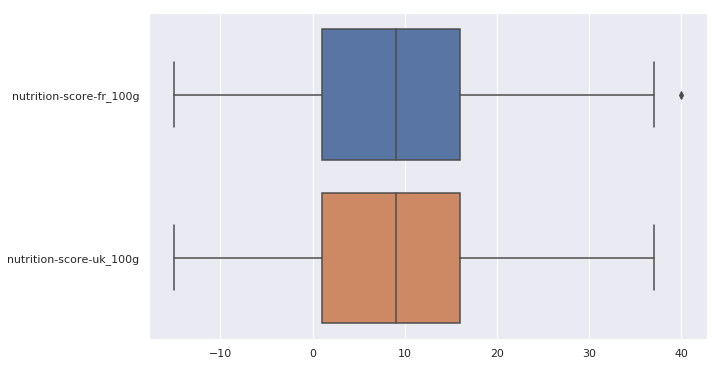

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['nutrition-score-fr_100g','nutrition-score-uk_100g']] ,orient='h' );

The distribution of the two columns is almost identical.<br>
We generate also the outlier report for these two columns :

In [80]:
data_numeric = data[['nutrition-score-fr_100g','nutrition-score-uk_100g']]
Q1 =  data_numeric.quantile(0.25).rename('q1')
Q3 = data_numeric.quantile(0.75).rename('q3')
IQR = (Q3 - Q1).rename('iqr')
M1 = (Q1 - 1.5*IQR).rename('min_whisker')
M2 = (Q3 + 1.5*IQR).rename('max_whisker')
N = ((data_numeric<M1) | (data_numeric>M2)).sum(axis=0).rename('iqr_outliers')
Z = ( np.abs((data_numeric - data_numeric.mean())/data_numeric.std()) > 3 ).sum(axis=0).rename('zscore_outiliers')
pd.concat([data_numeric.describe().loc[['min','max'], :].T.astype(int), Q1, Q3, IQR, M1, M2, N, Z], axis=1)

,min,max,q1,q3,iqr,min_whisker,max_whisker,iqr_outliers,zscore_outiliers
nutrition-score-fr_100g,-15,40,1.0,16.0,15.0,-21.5,38.5,1,3
nutrition-score-uk_100g,-15,37,1.0,16.0,15.0,-21.5,38.5,0,1


The outliers here are the most extreme values. We choose not to remove them because products with extreme nutrition score are rare, but not unusual.<br>
These two columns has almost identical distribution. They are also almost equal and differs in only 5% of cases.

In [81]:
(data_numeric.dropna()['nutrition-score-fr_100g'] != data_numeric.dropna()['nutrition-score-uk_100g']).value_counts()

False    237725
True      12557
dtype: int64

We choose to keep theses two columns. But, in future, we will use the french score only.

# B. Manipulating the data
_exercise :_<br>
You will work with the data to investigate some properties of your choice. Your goal is to
choose 3 interesting questions to answer about the data and perform the necessary steps
for the analysis.
The questions that you choose must be complex enough to allow for some substantial
data manipulation. As a guideline here is a sample topic of analysis
Topic: Investigate the macronutrient breakdown across various foods (this is the
percentage of calories that come from the 3 macronutrient groups: carbohydrates,
protein and fats). What are the foods that have the highest ratios of each macronutrient?
What are the foods that are most balanced? What is the macronutrient breakdown across
different countries? Can you notice some trends or insights about the data?
For each of your 3 questions choose appropriate visual methods to communicate your
findings.<br>

_solution :_<br>
### Question 1 :  What are the foods that have the highest ratios of each macronutrient?

We will keep only the columns which concerns the macronutriments and drop null values (30% of dataset).<br>
Additional columns will be created which contains :
- The calories associated to each macronutrient 
- The precent of energy for each macronutrient
- The total calculated calories

In [82]:
data2.columns

Index(['code', 'main_category', 'states_en', 'states_tags', 'pnns_groups_2',
       'pnns_groups_1', 'nutrition_grade_fr', 'additives', 'ingredients_text',
       'countries_tags', 'states', 'brands_tags', 'categories_tags', 'url',
       'creator', 'created_t', 'last_modified_t', 'created_datetime',
       'product_name', 'packaging', 'last_modified_datetime', 'energy_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'saturated-fat_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [83]:
df = data.loc[:, data.columns.isin(data2.columns)].dropna()
df["carbohydrates_colories"] = 17*df['carbohydrates_100g']
df["proteins_colories"] = 17*df['proteins_100g']
df["fat_colories"] = 37*df['fat_100g']
df['total_calories'] = df["carbohydrates_colories"]  + df["proteins_colories"] + df["fat_colories"] 
df['carbohydrates_pct'] = 100*df["carbohydrates_colories"] / df['total_calories']
df['fat_pct'] = 100*df["fat_colories"] / df['total_calories']
df['proteins_pct'] = 100*df["proteins_colories"] / df['total_calories']

In [84]:
df.shape

(224575, 39)

We compare the calculated total calories with the energy_100g. Most of difference is under 10%.<br>

In [85]:
(100*(df.energy_100g - df.total_calories)/df.energy_100g).replace([np.inf, -np.inf], np.nan).dropna().astype(int).value_counts()[:30]

 0     54705
 1     25889
-1     17906
 2     15653
-2     11271
 3     10477
-3      9631
-4      7849
 4      7634
-5      5815
 5      5101
-6      4790
-7      4312
 6      3449
-8      3056
 7      2580
-9      2058
 18     2010
 8      1934
-10     1836
-11     1441
 9      1328
 10     1083
-13     1031
 17     1007
 11      966
 13      949
 19      934
-12      858
 12      828
dtype: int64

We drop products with difference more than 10%. There is 26218 row to drop.

In [86]:
(np.abs((100*(df.energy_100g - df.total_calories)/df.energy_100g).replace([np.inf, -np.inf], np.nan).fillna(100).astype(int)) <= 10).value_counts()

True     198357
False     26218
dtype: int64

In [87]:
df = df[(np.abs((100*(df.energy_100g - df.total_calories)/df.energy_100g).replace([np.inf, -np.inf], np.nan).fillna(100).astype(int)) <= 10)]
df.shape

(198357, 39)

In [88]:
df[['carbohydrates_colories','proteins_colories','fat_colories','total_calories','energy_100g','carbohydrates_pct','proteins_pct','fat_pct']].head()

,carbohydrates_colories,proteins_colories,fat_colories,total_calories,energy_100g,carbohydrates_pct,proteins_pct,fat_pct
1,1092.93,60.69,1057.09,2210.71,2243.0,49.437963,2.745272,47.816765
2,1032.07,303.62,660.82,1996.51,1941.0,51.693706,15.207537,33.098757
3,303.62,303.62,2114.18,2721.42,2540.0,11.156676,11.156676,77.686649
7,982.77,239.02,693.75,1915.54,1833.0,51.305115,12.477944,36.216941
12,623.39,283.39,1356.79,2263.57,2230.0,27.540125,12.519604,59.940271


We will create a dataframe whit the top 10 of each macronutrient.<br>
For each macronutriment mn in ['carbohydrates','proteins','fat'], we create a dataset containing the top 10 products.<br>
Then, We store the result in a dictionary tmp, and concatenante these 4 datasets to produce the final one.

In [89]:
tmp = { mn:df[(df[mn+'_pct']<=100.)].sort_values(mn+'_pct', ascending=False).head(10)[['countries_tags','product_name','main_category',mn+'_pct']].reset_index(drop=True) for mn in ['carbohydrates','proteins','fat'] }
pd.concat(tmp.values(), axis=1, keys=tmp.keys())

carbohydrates  \
  countries_tags   
0         france   
1         france   
2  united states   
3    switzerland   
4  united states   
5  united states   
6         france   
7         france   
8  united states   
9  united states   

                                                                   \
                                                     product_name   
0                                                         Getränk   
1                                             Confiture d'abricot   
2                                                  Squeeze Ginger   
3                                                    Fruit Stixxs   
4                      Fat Free Homestyle Dressing, Honey Mustard   
5                                             Spaghetti Seasoning   
6                           Boisson aux fruits Saveur Pomme Poire   
7                              Sucre blond de canne en poudre Bio   
8  Creamery, Berry Punch, With Grape, Pear, And Strawberry Flavor   
9                                                  Tropical Punch   

                                                              proteins  \
                        main_category carbohydrates_pct countries_tags   
0                        en:beverages             100.0  united states   
1  en:plant-based-foods-and-beverages             100.0  united states   
2                          en:unknown             100.0  united states   
3                         en:desserts             100.0  united states   
4                          en:unknown             100.0  united states   
5                          en:unknown             100.0  united states   
6                        en:beverages             100.0  united states   
7                       en:sweeteners             100.0  united states   
8                          en:unknown             100.0  united states   
9                          en:unknown             100.0  united states   

                                                                          fat  \
                       product_name main_category proteins_pct countries_tags   
0           Organic Vegetable Broth    en:unknown        100.0  united states   
1  Coral, Chunk Light Tuna In Water    en:unknown        100.0         france   
2        Fresh Market Cooked Shrimp    en:unknown        100.0    switzerland   
3     Solid White Albacore In Water    en:unknown        100.0         france   
4                     Cooked Shrimp    en:unknown        100.0  united states   
5         Solid White Tuna In Water    en:unknown        100.0    switzerland   
6         Chunk Light Tuna In Water    en:unknown        100.0  united states   
7                     Cooked Shrimp    en:unknown        100.0  united states   
8                     Cooked Shrimp    en:unknown        100.0  united states   
9                  Chunk Light Tuna    en:unknown        100.0         france   

                                                  \
                                    product_name   
0                                      Olive Oil   
1                                 Huile de noix    
2       Huile d'olive extra vierge arôme basilic   
3     Huile d'olive vierge extra Monini Classico   
4  European Style Cultured Butter Lightly Salted   
5                                        unknown   
6                                         Spread   
7                           Vegetable Oil Spread   
8                                         Spread   
9                                NAT&vie cuisine   

                                               
                        main_category fat_pct  
0                          en:unknown   100.0  
1  en:plant-based-foods-and-beverages   100.0  
2                          en:unknown   100.0  
3                             en:fats   100.0  
4                          en:unknown   100.0  
5                          en:unknown   100.0  
6                          en:unknown   100.0  
7             

If we exclude products whith 100% percentage of one micronutriment :

In [90]:
tmp = { mn:df[(df[mn+'_pct']<=99.)].sort_values(mn+'_pct', ascending=False).head(10)[['countries_tags','product_name','main_category',mn+'_pct']].reset_index(drop=True) for mn in ['carbohydrates','proteins','fat'] }
pd.concat(tmp.values(), axis=1, keys=tmp.keys())

carbohydrates                                        \
  countries_tags                          product_name   
0         france                                Orange   
1         france                          Oasis Orange   
2        belgium                          oasis orange   
3         france                          Oasis orange   
4         france                                Orange   
5         france                          Oasis Ananas   
6         france                           Multifruits   
7         france                                Orange   
8         france      Confiture Extra Clémentine Corse   
9         france  Confiture de pêches et de nectarines   

                                                              proteins  \
                        main_category carbohydrates_pct countries_tags   
0                        en:beverages         99.000000        germany   
1                        en:beverages         99.000000        germany   
2                        en:beverages         99.000000         france   
3                        en:beverages         99.000000         france   
4                        en:beverages         99.000000         france   
5                        en:beverages         99.000000         france   
6                        en:beverages         99.000000    netherlands   
7                        en:beverages         99.000000         france   
8  en:plant-based-foods-and-beverages         98.997613         france   
9  en:plant-based-foods-and-beverages         98.997613         france   

                                                                     \
                                      product_name    main_category   
0           Premium Kabeljaurückenfilets ohne Haut       en:seafood   
1              Pazifische Kabeljau Filet Portionen       en:seafood   
2                  Thon entier albacore au naturel  en:canned-foods   
3                  Thon entier albacore au naturel  en:canned-foods   
4                 Thon entier albacore au naturel   en:canned-foods   
5                                        Pure whey       en:unknown   
6                                       Strooikaas       en:dairies   
7                           Inko X-treme Muscle 95       en:unknown   
8  Cuisses de grenouilles sauvages crues congelées         en:meats   
9                                 Filets de lingue       en:unknown   

                                     fat                            \
  proteins_pct            countries_tags              product_name   
0    98.837209              south africa   NuVolite 50% Fat Spread   
1    98.837209                   belgium                     Becel   
2    98.693759                    france                Mayonnaise   
3    98.693759            united kingdom            Flora Original   
4    98.693759            united kingdom            Flora original   
5    97.629382                    france  Mayonnaise Jérôme Dubois   
6    97.304610               switzerland     Mayonnaise aux herbes   
7    96.937903           belgium, france    Mayon(n)aise au Citron   
8    96.788752                    france              Mayon(n)aise   
9    96.764530  belgium, france, belgium                Mayonnaise   

                                                  
                        main_category    fat_pct  
0                        en:magarines  98.999304  
1  en:plant-based-foods-and-beverages  98.989298  
2                        en:groceries  98.989298  
3             en:vegetable-fat-spread  98.989298  
4             en:vegetable-fat-spread  98.989298  
5                        en:groceries  98.988062  
6                          en:unknown  98.980578  
7                        en:groceries  98.976794  
8                        en:groceries  98.959683  
9                        en:groceries  98.947062

As we can see :
- almost all top 15 carbohydrates are sugar based products like juice and marmelades
- almost all top 15 fat products are oil, butter and mayonnaise.
- almost all top 15 protein products are fish, meat and protein supplement products.

If we want to create a single list of top 10 products which takes into account the contribution of each macronutriment in total energy, we propose to use geometric mean of the three "*_pct" columns.<br>
Why choosing geometric mean ?<br>
- The pct columns reflects the contribution of each macronutriment in total energy. So, values are already standardized.
- The geometric mean penalizes zero and small contributions, while artithmetic mean does not.
- The arithmetic mean will always give 100/3 because the sum of pct columns always gives 100
- The harmonic mean will gives infinity values when dividing by 0.

Here is the top 10 list of product which best average contrubution of each macronutriment :

In [91]:
df['mean_pct'] = df.carbohydrates_pct*df.proteins_pct*df.fat_pct 
top_products = df.sort_values('mean_pct', ascending=False)[['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','mean_pct']].drop_duplicates().head(10).reset_index(drop=True) 
top_products

,countries_tags,product_name,main_category,carbohydrates_pct,proteins_pct,fat_pct,mean_pct
0,united states,Stuffed Chicken Breast With Rib Meat,en:unknown,33.284145,33.284145,33.431709,37036.795330
1,france,"Émincés de Poulet, Petits légumes & Penne",en:meals,33.283133,33.283133,33.433735,37036.785278
2,switzerland,Beignets de crevettes,en:seafood,33.283133,33.283133,33.433735,37036.785278
3,switzerland,unknown,en:unknown,33.283133,33.283133,33.433735,37036.785278
4,united states,Boneless Ribs,en:unknown,33.454003,33.454003,33.091993,37035.577396
5,united states,Crispy Chicken Bites,en:unknown,33.157565,33.157565,33.684870,37033.958450
6,france,Filet pané colin Pêche Océan Céreale x4,en:unknown,33.504927,32.754817,33.740256,37028.168113
7,france,Nuggets de filets de poulet,en:unknown,33.137979,32.921391,33.940629,37027.474777
8,france,Salade mexicaine au thon,en:canned-foods,33.972455,33.054280,32.973265,37026.834654
9,france,Poulet basquaise,en:unknown,34.088032,32.914269,32.997699,37022.845923


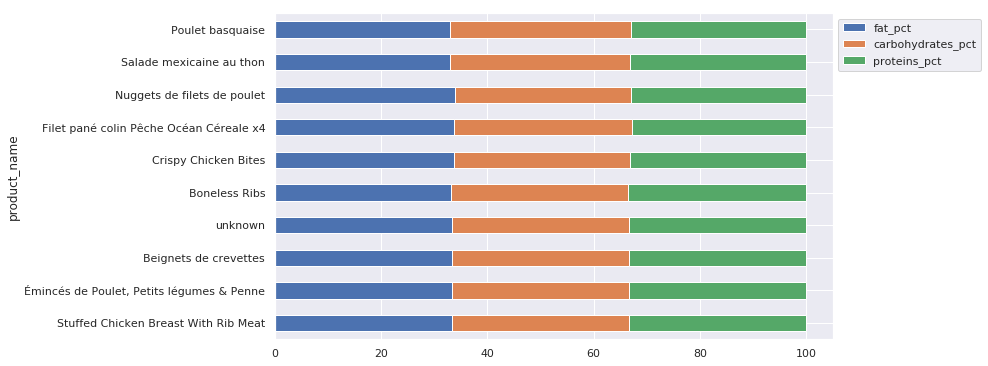

In [92]:
ax = top_products[['product_name','fat_pct','carbohydrates_pct','proteins_pct']].set_index('product_name').plot(kind='barh', stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1));

Top 10 products are those with equivalent contribution to energy.

### Question 2 :  What are the foods that are most balanced?

"The acceptable macronutrient distribution ranges (AMDR) are 45–65% of your daily calories from carbs, 20–35% from fats and 10–35% from protein". (source: https://www.healthline.com/nutrition/best-macronutrient-ratio#diet-quality ).

The method that we will apply is :
 - Choose products which respects the above rule (there is about 9600 product which respects this rule)
 - Select top 10 products between them based on the lowest nutrition score

In [93]:
tmp = df[ (df.carbohydrates_pct.between(45,65)) & (df.fat_pct.between(20,35)) & (df.proteins_pct.between(10,35)) & (df.product_name != 'unknown')][['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-fr_100g']].drop_duplicates()
tmp.shape

(9645, 7)

In [94]:
tmp[['nutrition-score-fr_100g']].describe()

,nutrition-score-fr_100g
count,9645.000000
mean,3.875998
std,5.750802
min,-12.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,32.000000


Most of these products respecting the above rule have a low nutrition score.<br>
This is the top 10 products with lowest nutrition score respecting the above rule.

In [95]:
tmp = df[ (df.carbohydrates_pct.between(45,65)) & (df.fat_pct.between(20,35)) & (df.proteins_pct.between(10,35)) & (df.product_name != 'unknown')][['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-fr_100g']].drop_duplicates()
tmp.sort_values('nutrition-score-fr_100g', ascending=True).head(10).reset_index(drop=True)

,countries_tags,product_name,main_category,carbohydrates_pct,proteins_pct,fat_pct,nutrition-score-fr_100g
0,united kingdom,Corn on the cob,en:plant-based-foods-and-beverages,55.119454,20.887372,23.993174,-12.0
1,france,Mélange de légumes vapeur,en:plant-based-foods-and-beverages,54.063604,22.693365,23.243031,-10.0
2,switzerland,Grains de maïs non salés,en:plant-based-foods-and-beverages,63.432836,15.858209,20.708955,-10.0
3,germany,Pfannen-Gemüse mexikanische Art,en:plant-based-foods-and-beverages,51.033138,17.231969,31.734893,-10.0
4,france,Legumes pour wok,en:plant-based-foods-and-beverages,46.329255,33.092325,20.578420,-10.0
5,france,Légumes pour wok surgelés,en:plant-based-foods-and-beverages,46.329255,33.092325,20.578420,-10.0
6,france,Maïs doux,en:plant-based-foods-and-beverages,60.028944,14.269175,25.701881,-9.0
7,france,Maïs sans Sucres Ajoutés,en:plant-based-foods-and-beverages,58.705036,14.676259,26.618705,-9.0
8,france,Maïs doux en grain sous vide bio,en:plant-based-foods-and-beverages,59.631687,14.410991,25.957322,-9.0
9,france,Maïs sans sucres ajoutés,en:plant-based-foods-and-beverages,60.554090,16.259894,23.186016,-9.0


In [96]:
tmp = df[ (df.carbohydrates_pct.between(45,65)) & (df.fat_pct.between(20,35)) & (df.proteins_pct.between(10,35)) & (df.product_name != 'unknown')][['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-uk_100g']].drop_duplicates()
tmp.sort_values('nutrition-score-uk_100g', ascending=True).head(10).reset_index(drop=True)

,countries_tags,product_name,main_category,carbohydrates_pct,proteins_pct,fat_pct,nutrition-score-uk_100g
0,united kingdom,Corn on the cob,en:plant-based-foods-and-beverages,55.119454,20.887372,23.993174,-12.0
1,france,Légumes pour wok surgelés,en:plant-based-foods-and-beverages,46.329255,33.092325,20.578420,-10.0
2,germany,Pfannen-Gemüse mexikanische Art,en:plant-based-foods-and-beverages,51.033138,17.231969,31.734893,-10.0
3,switzerland,Grains de maïs non salés,en:plant-based-foods-and-beverages,63.432836,15.858209,20.708955,-10.0
4,france,Legumes pour wok,en:plant-based-foods-and-beverages,46.329255,33.092325,20.578420,-10.0
5,france,Mélange de légumes vapeur,en:plant-based-foods-and-beverages,54.063604,22.693365,23.243031,-10.0
6,france,Maïs ultra croquant,en:plant-based-foods-and-beverages,60.028944,14.269175,25.701881,-9.0
7,france,Casino Bio - Maïs doux,en:plant-based-foods-and-beverages,59.631687,14.410991,25.957322,-9.0
8,france,Maïs Bio,en:plant-based-foods-and-beverages,60.554090,16.259894,23.186016,-9.0
9,france,Maïs doux en grain sous vide bio,en:plant-based-foods-and-beverages,59.631687,14.410991,25.957322,-9.0


Here is the list of top 20 products with lowest nutrition score

In [97]:
tmp = df[(df.product_name != 'unknown')][['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-fr_100g']].drop_duplicates()
tmp.sort_values('nutrition-score-fr_100g', ascending=True).head(20).reset_index(drop=True)

,countries_tags,product_name,main_category,carbohydrates_pct,proteins_pct,fat_pct,nutrition-score-fr_100g
0,france,Fèves pelées,en:plant-based-foods-and-beverages,51.855618,40.620234,7.524148,-14.0
1,france,Edamamé Beans Nature,en:plant-based-foods-and-beverages,8.846487,39.809193,51.344319,-14.0
2,spain,Edamame,en:plant-based-foods-and-beverages,33.663366,37.029703,29.306931,-14.0
3,france,Choux-fleurs en fleurettes,en:plant-based-foods-and-beverages,30.219365,41.792738,27.987897,-14.0
4,france,Fèves pelées,en:plant-based-foods-and-beverages,60.476066,34.684803,4.839132,-13.0
5,france,Lentilles Bio,en:plant-based-foods-and-beverages,52.911189,40.139522,6.949289,-13.0
6,spain,Habas congeladas &quot;Barnetti&quot;,en:plant-based-foods-and-beverages,70.247934,26.694215,3.057851,-13.0
7,france,TOFU Ail des ours et Piment d'espelette,en:plant-based-foods-and-beverages,3.197759,45.763491,51.038749,-13.0
8,france,Lentilles vertes Bio - 500 g - Markal,en:plant-based-foods-and-beverages,49.825175,43.706294,6.468531,-13.0
9,united kingdom,Garden Peas in Water,en:plant-based-foods-and-beverages,52.644560,32.145793,15.209646,-13.0


In [98]:
tmp = df[(df.product_name != 'unknown')][['countries_tags','product_name','main_category','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-uk_100g']].drop_duplicates()
tmp.sort_values('nutrition-score-uk_100g', ascending=True).head(20).reset_index(drop=True)

,countries_tags,product_name,main_category,carbohydrates_pct,proteins_pct,fat_pct,nutrition-score-uk_100g
0,spain,Edamame,en:plant-based-foods-and-beverages,33.663366,37.029703,29.306931,-14.0
1,france,Edamamé Beans Nature,en:plant-based-foods-and-beverages,8.846487,39.809193,51.344319,-14.0
2,france,Choux-fleurs en fleurettes,en:plant-based-foods-and-beverages,30.219365,41.792738,27.987897,-14.0
3,france,Fèves pelées,en:plant-based-foods-and-beverages,51.855618,40.620234,7.524148,-14.0
4,france,TOFU Ail des ours et Piment d'espelette,en:plant-based-foods-and-beverages,3.197759,45.763491,51.038749,-13.0
5,france,Fèves pelées,en:plant-based-foods-and-beverages,60.476066,34.684803,4.839132,-13.0
6,united kingdom,Garden Peas in Water,en:plant-based-foods-and-beverages,52.644560,32.145793,15.209646,-13.0
7,france,Lentilles Bio,en:plant-based-foods-and-beverages,52.911189,40.139522,6.949289,-13.0
8,france,Lentilles vertes Bio - 500 g - Markal,en:plant-based-foods-and-beverages,49.825175,43.706294,6.468531,-13.0
9,spain,Habas congeladas &quot;Barnetti&quot;,en:plant-based-foods-and-beverages,70.247934,26.694215,3.057851,-13.0


### Question 3 :  What is the macronutrient breakdown across different countries?

In [99]:
# prepare a temporary dataset containing the columns that we will use
tmp = df[['countries_tags','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-fr_100g','nutrition_grade_fr']].reset_index(drop=True)
# calculate sum and count of each micronutriment by coutries_tag
tmp_agg = tmp.groupby('countries_tags').agg(['sum','count']).reset_index()

In [100]:
tmp_agg.columns = tmp_agg.columns.map('_'.join)
tmp_agg.head()

,countries_tags_,carbohydrates_pct_sum,carbohydrates_pct_count,proteins_pct_sum,proteins_pct_count,fat_pct_sum,fat_pct_count,nutrition-score-fr_100g_sum,nutrition-score-fr_100g_count,nutrition_grade_fr_sum,nutrition_grade_fr_count
0,"Côte d'ivoire, france",52.474277,1,5.830475,1,41.695247,1,28.0,1,e,1
1,"Korea, Republic of",61.445783,1,5.120482,1,33.433735,1,15.0,1,d,1
2,"albania, denmark, italy",62.344199,1,30.560882,1,7.094919,1,0.0,1,b,1
3,"albania, france",67.733172,1,7.696951,1,24.569876,1,0.0,1,b,1
4,"albania, italy",196.969297,3,40.269688,3,62.761016,3,8.0,3,dba,3


In [101]:
# prepare a temporary dataset containing the columns that we will use
tmp = df[['countries_tags','carbohydrates_pct','proteins_pct','fat_pct','nutrition-score-fr_100g','nutrition_grade_fr']].reset_index(drop=True)
# calculate sum and count of each micronutriment by coutries_tag
tmp_agg = tmp.groupby('countries_tags').agg(['sum','count']).reset_index()
#remove multiindex column to have one level index
tmp_agg.columns = tmp_agg.columns.map('_'.join)
# explode (expand) the list of countries to have one country by row :
# 1- split the comma-separated list of contries to list, than transform it to pandas series
# 2- stack() to transform rows to columns. Reset index to have the old index as column 'level_0'
# 3- join the resulting dataset with the original one using old index
# 4- rename the column 0 (generated by stack()) to 'country'
tmp_agg = pd.merge(tmp_agg, tmp_agg.countries_tags_.str.split(', ').apply(pd.Series).stack().reset_index(), left_index=True, right_on='level_0')
tmp_agg['country'] = tmp_agg[0]
# add mean columns by country for each macronutriment
# we don't use mean because after exploding dataset, we can have multiple lines for each country.
# the global mean will be "sum of sums" divided by "sum of counts".
tmp_agg = tmp_agg.groupby('country').sum()
for n in ['carbohydrates','fat','proteins']:
    tmp_agg[f'mean_{n}_pct'] = tmp_agg[f'{n}_pct_sum']/tmp_agg[f'{n}_pct_count']
tmp_agg[f'mean_nutrition-score-fr_100g'] = tmp_agg[f'nutrition-score-fr_100g_sum']/tmp_agg[f'nutrition-score-fr_100g_count']    
# sort values by mean nutrition score 
tmp_agg = tmp_agg.sort_values('mean_nutrition-score-fr_100g',ascending=False)
# there is countries with very little products. We remove these countries in order to have "comparable" contries
# remove countries with less than 20 products
tmp_agg = tmp_agg[(tmp_agg.carbohydrates_pct_count > 20)]
tmp_agg[['mean_carbohydrates_pct','mean_fat_pct','mean_proteins_pct','mean_nutrition-score-fr_100g']].head()

,mean_carbohydrates_pct,mean_fat_pct,mean_proteins_pct,mean_nutrition-score-fr_100g
country,,,,
morocco,51.112204,39.368823,9.518973,17.862069
denmark,46.571210,42.896392,10.532397,15.468254
hungary,45.973841,43.339238,10.686921,15.000000
czech republic,56.687972,34.847754,8.464274,14.967742
romania,38.108710,47.870782,14.020508,14.457143


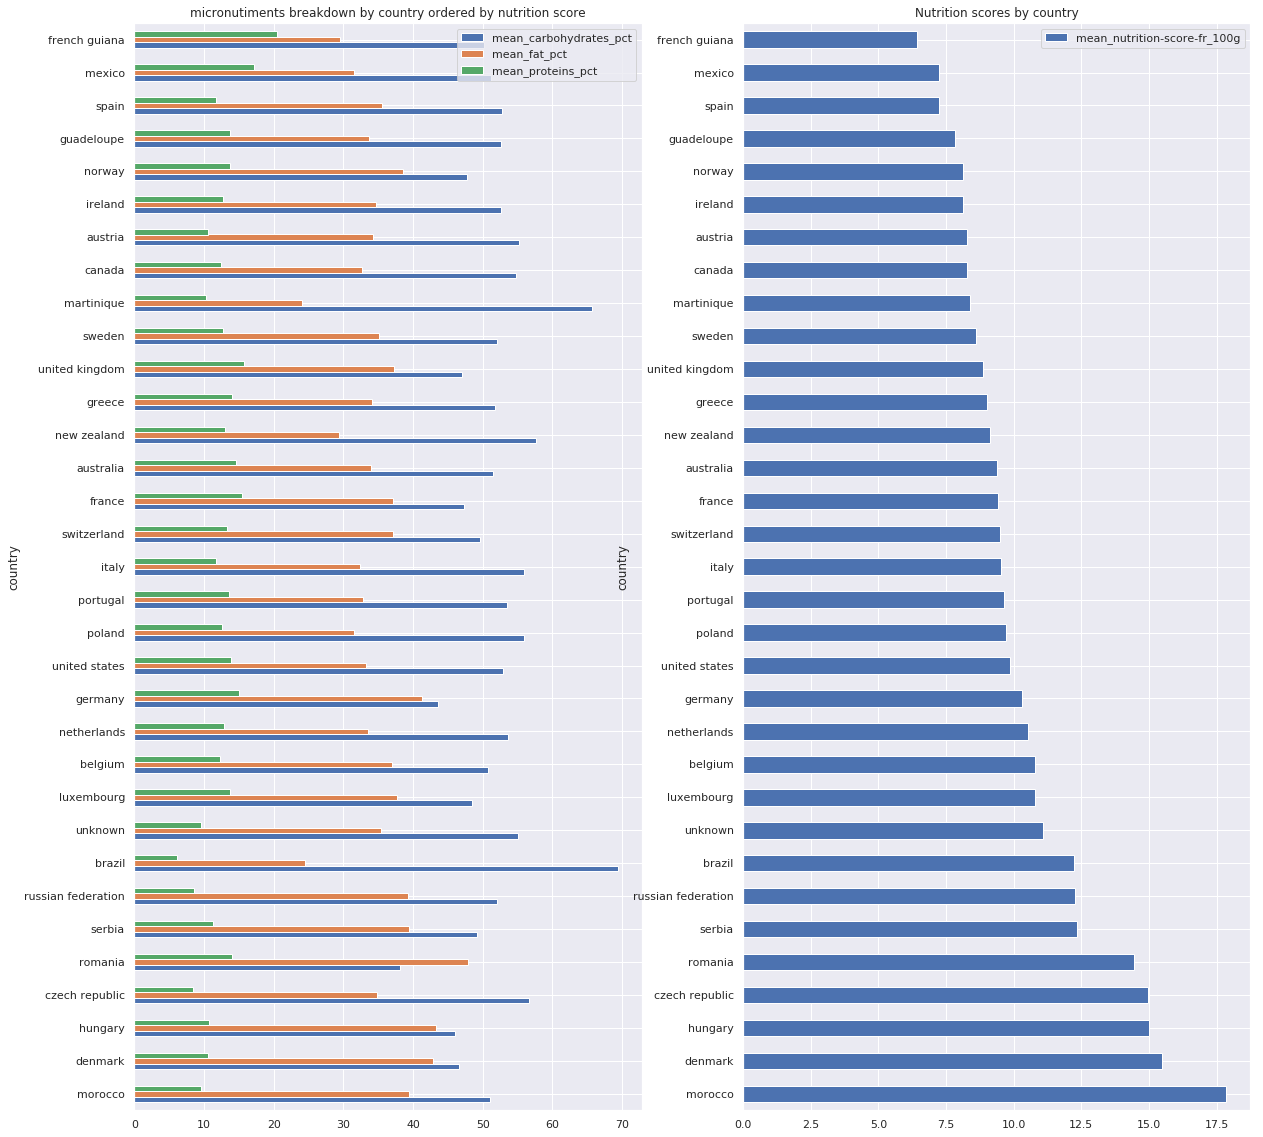

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
tmp_agg[['mean_carbohydrates_pct','mean_fat_pct','mean_proteins_pct']].plot(kind='barh', stacked=False, title='micronutiments breakdown by country ordered by nutrition score', ax=axes[0]);
tmp_agg[['mean_nutrition-score-fr_100g']].plot(kind='barh', title='Nutrition scores by country', ax=axes[1]);

We can see that :
- The nutrition score is more correlated with fats (when fats increases, the score increases). Products with less fat are more healthy.
- The north american, north european, oceanian and european countries has products with best nutrition score and micronutiments breakdown

## Question 4 : Can you notice some trends or insights about the data

The correlation matrix between micronutriments confirms what we have seen in the previous chart.

In [103]:
df[['countries_tags','carbohydrates_100g','proteins_100g','fat_100g','nutrition-score-fr_100g','nutrition_grade_fr']].corr()

,carbohydrates_100g,proteins_100g,fat_100g,nutrition-score-fr_100g
carbohydrates_100g,1.000000,-0.196465,-0.096179,0.227697
proteins_100g,-0.196465,1.000000,0.247277,0.085815
fat_100g,-0.096179,0.247277,1.000000,0.570610
nutrition-score-fr_100g,0.227697,0.085815,0.570610,1.000000


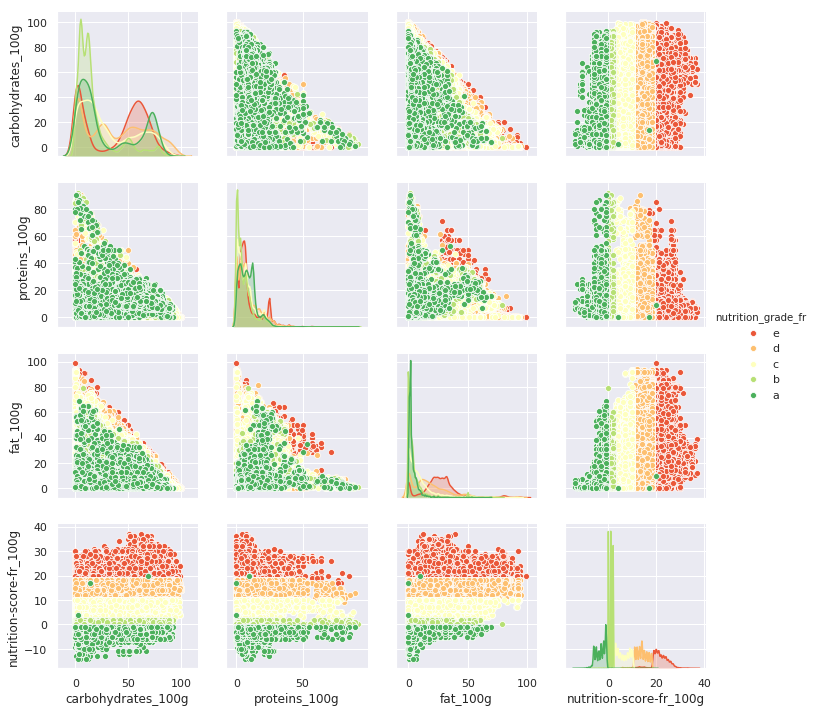

In [104]:
sns.pairplot(data=df[['carbohydrates_100g','proteins_100g','fat_100g','nutrition-score-fr_100g','nutrition_grade_fr']], hue='nutrition_grade_fr', hue_order=['e','d','c','b','a'], palette=sns.color_palette("RdYlGn", 5));

In the histograms, we can see that :
- for fat : the good foods (with grades a, b in green) have less fat. Bad food (in red) have more fat.
- for protein : distributions for each nutrition grade are not seperate. So, there is a very little correlation between protein and nutrition grade. 
- for carbohydrates : the correlation exists, but not as fat.
 

## C. Text data
_exercise :_<br>
You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.<br>

_solution :_<br>
This is the first 10 rows

In [105]:
data.ingredients_text.head(10)

0                                                                                                                                                                                                            
1                                                                                                                Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.
2                                      Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.
3                                                                                                               Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.
4                                                                                                                                                                               

The following transformations are to be done :
- remove spaces and dots from the beginning and end of each component
- lowercase all strings
- replace ( by comma
- remove rows with only blank characters (space, tabulations ...)
- remove null values

After making these transformations, we join all series element with comma to have one string. Then we split this string to have a list of words.<br>
Finally, we remove blank elements form the list.
The final result is stored in "ingredients" variable.

In [106]:
ingredients = pd.Series((','.join(data['ingredients_text'].str.strip(' .').str.lower().str.replace('(',',').str.replace(')',',').replace(r'^\s*$', np.nan, regex=True).dropna())).split(',')).str.strip()
ingredients = ingredients.replace(r'^\s*$', np.nan, regex=True).dropna()

This is the top 20 ingredient in the list

In [107]:
ingredients.value_counts()[:20]

salt                    99112
sugar                   73433
water                   70415
sel                     49010
sucre                   38161
eau                     37026
citric acid             31435
niacin                  20897
riboflavin              20385
dextrose                20221
corn syrup              18576
folic acid              17891
natural flavor          16857
wheat flour             16799
spices                  15225
sea salt                14738
soy lecithin            13592
reduced iron            13080
soybean oil             12068
thiamine mononitrate    12016
dtype: int64

Some ingredients are the same but :
- In different languages (salt - sel in french)
- Or with 's' at end ( 'natural flavor':'natural flavors')
- Or with another name ( 'sea salt':'salt' )<br>

We translate the most important of them and regenerate the top 20 list

In [108]:
ingredients_trans = {'sel':'salt', 'sucre':'sugar', 'eau':'water', 'sea salt':'salt', 'natural flavor':'natural flavors'}
def replace_ingredients(ing):
    if ing in ingredients_trans.keys():
        return ingredients_trans[ing]
    return ing
ingredients = ingredients.apply(replace_ingredients).value_counts()
ingredients[:20]

salt                        162860
sugar                       111594
water                       107441
citric acid                  31435
natural flavors              28316
niacin                       20897
riboflavin                   20385
dextrose                     20221
corn syrup                   18576
folic acid                   17891
wheat flour                  16799
spices                       15225
soy lecithin                 13592
reduced iron                 13080
soybean oil                  12068
thiamine mononitrate         12016
enzymes                      11729
high fructose corn syrup     11171
milk                         10604
maltodextrin                 10295
dtype: int64

The top 5 ingredients are :

In [109]:
ingredients[:5]

salt               162860
sugar              111594
water              107441
citric acid         31435
natural flavors     28316
dtype: int64

This information can also be presented in a chart like this 

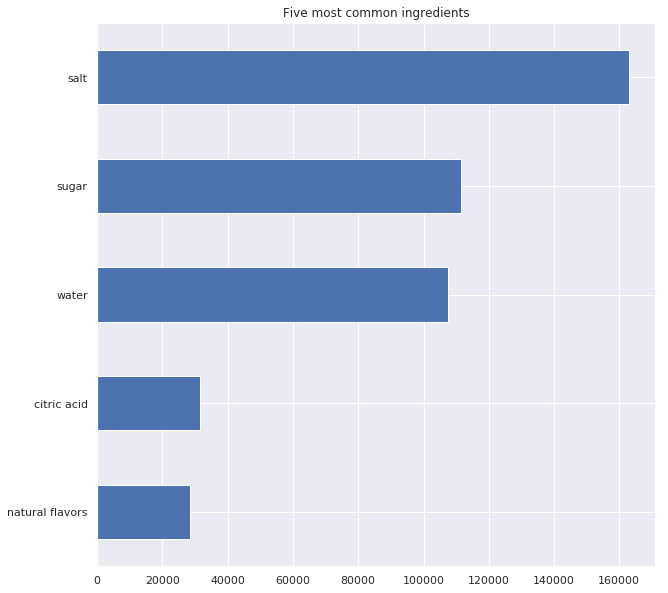

In [110]:
ingredients[:5].sort_values(ascending=True).plot(kind='barh',figsize=(10,10), title='Five most common ingredients');

## D. Time-series analysis
_exercise :_
You will investigate more closely the created_datetime and last_modified_datetime . First,
you will analyze the mean time difference between these two values. And second, you
will analyze the total number of items created each month over the full timeline of the
data. For the second question, you will also choose an appropriate method to visualize
your findings.

_solution :_<br>
#### 1. Mean time difference analysis

This is the mean time for all dataset which corresponds to 109 days.

In [111]:
(data.last_modified_datetime - data.created_datetime).mean()

Timedelta('109 days 02:17:34.487258')

The distribution of data in this time time difference is the following :

In [112]:
days = (data.last_modified_datetime - data.created_datetime).astype('timedelta64[D]')
days.value_counts()[:10]

0.0      247301
8.0        6465
1.0        2882
2.0        1646
3.0        1130
4.0         915
5.0         829
107.0       792
6.0         702
9.0         660
7.0         649
10.0        550
dtype: int64

And in term of percentage :

In [113]:
(100*(days.value_counts()/days.shape[0]))[:10]

0.0      70.898687
8.0       1.853450
1.0       0.826240
2.0       0.471891
3.0       0.323960
4.0       0.262321
5.0       0.237666
107.0     0.227058
6.0       0.201256
9.0       0.189215
7.0       0.186062
10.0      0.157679
dtype: float64

More than 70% of data is less than one day and top 10 list almost less then 10 days.<br>
The distribution of the remaining value with values under 200 is displayed in the following chart.<br>
Other values have very little counts.

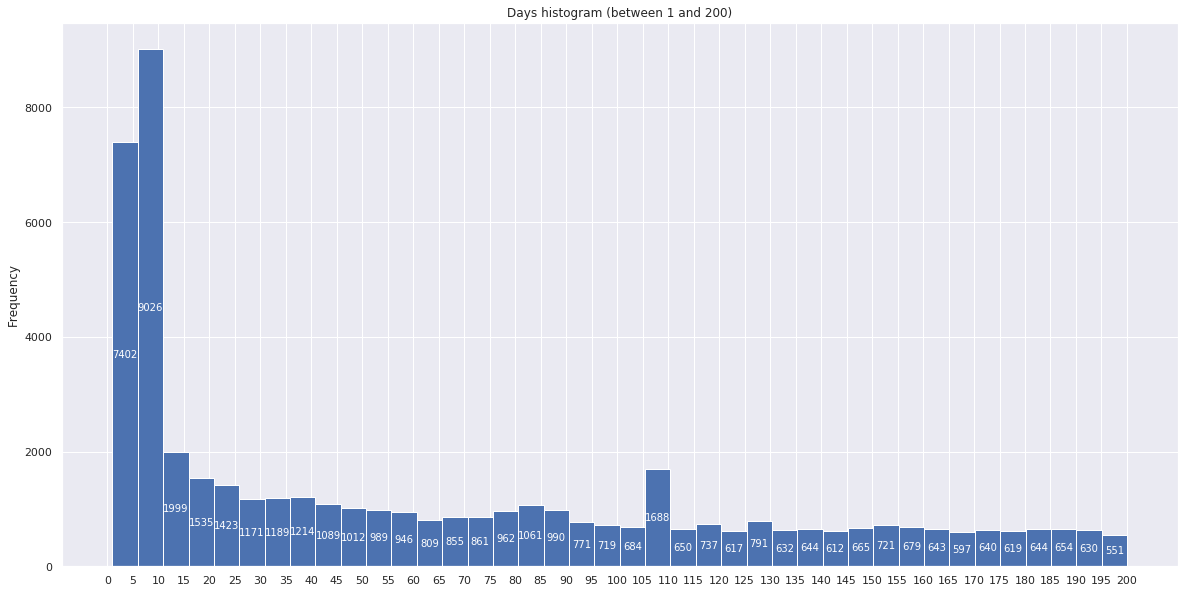

In [114]:
days = (data.last_modified_datetime - data.created_datetime).astype('timedelta64[D]')
ax = days[(days <=200) & (days>0)].plot(kind='hist', bins=40, figsize=(20,10), title='Days histogram (between 1 and 200)');
ax.set_xticks(range(0,201,5))
autolabelx(ax.patches);

#### 2. Total number of items created each month over the full timeline of the data

We transform the creation datetime to month, count them using value_counts, then sort them by date.

In [115]:
time_data = df.created_datetime.dt.to_period("M").value_counts().sort_index()
time_data

/home/vagrant/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


2012-01         1
2012-02         9
2012-03        84
2012-04        95
2012-05       265
2012-06       535
2012-07       253
2012-08        85
2012-09       235
2012-10       305
2012-11       376
2012-12       175
2013-01       235
2013-02       375
2013-03       322
2013-04       803
2013-05       422
2013-06       323
2013-07       383
2013-08       549
2013-09       663
2013-10       597
2013-11       334
2013-12       441
2014-01       339
2014-02       414
2014-03       471
2014-04       707
2014-05       602
2014-06       530
2014-07       470
2014-08       627
2014-09       508
2014-10       574
2014-11      1028
2014-12       779
2015-01       986
2015-02      1977
2015-03      1970
2015-04      1793
2015-05      1325
2015-06      1288
2015-07      1407
2015-08      1234
2015-09      1001
2015-10       972
2015-11      1136
2015-12      1524
2016-01      1502
2016-02      1082
2016-03      1339
2016-04      2397
2016-05      2294
2016-06       945
2016-07       861
2016-08   

In March 2017, more than 110,000 products where created!, which represents 60% of data.<br>
The chart bellow represents the products creation evolution over time.<br>
To beter present the chart, we have defined the y axis limit to 10000.

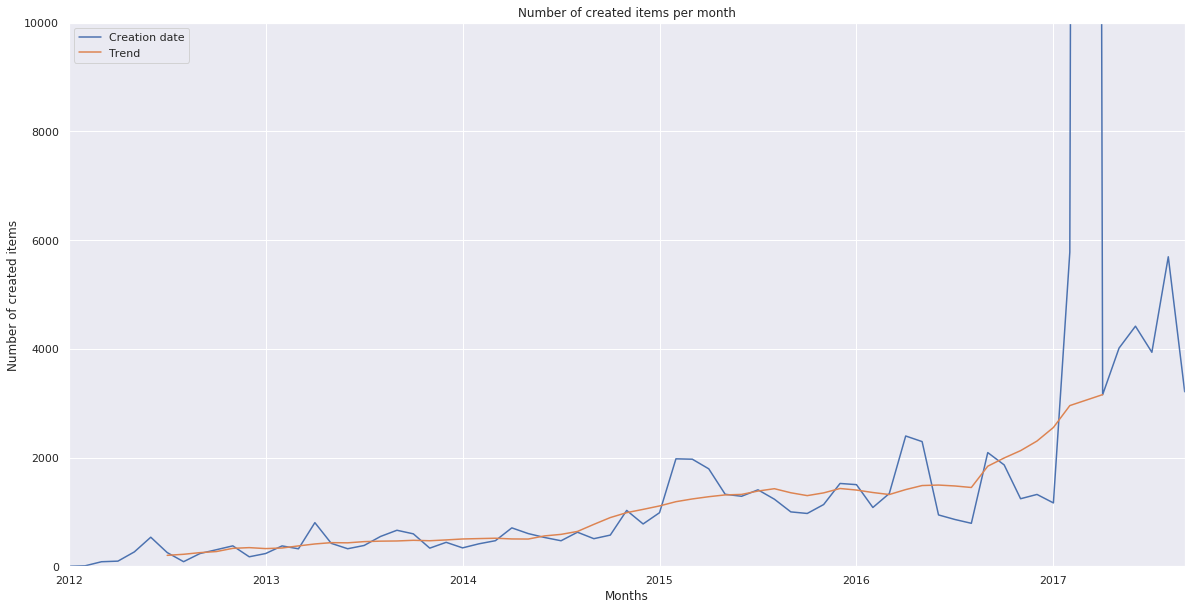

In [116]:
rolling_data = time_data[time_data<10000].rolling(12, center=True)
ax = time_data.plot(kind='line', figsize=(20,10), ylim=(0,10000),xlim=('01/2012','01/2018'),label='Creation date', title='Number of created items per month')
rolling_data.mean().plot(label='Trend')
ax.legend()
ax.set_xlabel("Months");
ax.set_ylabel("Number of created items");

The creation of products is increasing over time.

## E. Build a database
_exercise :_<br>
You will build a database to hold your data. It is up to you to de􀁿ne appropriate tables and
well as primary keys for connecting them. (The focus is definitely more on just using the
basic methods/tools introduced in the course and not on building a complex database.) In
particular, you can follow the following list of steps:
- restrict your data to 1000 entries and 5 columns of your choice
- create a connection to a sqlite3 database
- create one or multiple tables, at least one of the tables should have a PRIMARY KEY
- fill the database with your data
- run at least one query to demonstrate that it works correctly
_solution :_<br>

In [117]:
import sqlite3

In [118]:
data.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'packaging', 'brands_tags', 'categories_tags',
       'countries_tags', 'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

- restrict your data to 1000 entries and 5 columns of your choice

In [119]:
df = data.dropna().loc[(data.main_category != 'en:unknown')].reset_index(drop=True).loc[:999,['product_name','created_datetime','countries_tags','main_category','fat_100g']]

In [120]:
df.shape

(1000, 5)

- create a connection to a sqlite3 database

In [121]:
db = sqlite3.connect('database.sqlite')
def run_query(query):
    return pd.read_sql_query(query,db)
def run_ddl(query):
    cursor = db.cursor()
    cursor.execute(query)

- create one or multiple tables, at least one of the tables should have a PRIMARY KEY

We create 2 tables :
* One with list of products : product_name and main_category. The primary key is product_id.
* One with list of product items : created_datetime, countries_tags, fat_100g and the primary key of the product. The primary key is item_id.

In [122]:
run_ddl('drop table if exists  products;')
run_ddl('create table products(product_id integer primary key, product_name TEXT , main_category TEXT);')

In [123]:
run_ddl('drop table if exists  product_items;')
run_ddl('create table product_items(item_id integer primary key, created_datetime DATE , countries_tags TEXT, fat_100g FLOAT, product_id integer);')

- fill the database with your data

In [124]:
df_products =  df[['product_name','main_category']].drop_duplicates().reset_index(drop=True)
df_products.to_sql(name='products', con=db, if_exists='append', index=True, index_label='product_id')

In [125]:
run_query('SELECT * from products;').shape

(765, 3)

There is 765 distinct products in the table.<br>

In [126]:
df_data =  pd.merge(df,df_products.reset_index(), on=['product_name','main_category']).loc[:,['created_datetime','countries_tags','fat_100g','index']]
df_data.columns=['created_datetime','countries_tags','fat_100g','product_id']
df_data.to_sql(name='product_items', con=db, if_exists='append', index=True, index_label='item_id')

In [127]:
run_query('SELECT * from product_items;').shape

(1000, 5)

- run at least one query to demonstrate that it works correctly

In [128]:
run_query('select * from products;').head()

,product_id,product_name,main_category
0,0,Chaussons tressés aux pommes,en:sugary-snacks
1,1,Pain Burger Artisan,fr:boulange
2,2,Quiche Lorraine,en:meals
3,3,Sea Salt Potato Chips,en:chips-and-fries
4,4,Clam Chowder A Condensed Soup,en:meals


In [129]:
run_query('select * from product_items;').head()

,item_id,created_datetime,countries_tags,fat_100g,product_id
0,0,2017-01-15 17:32:08+00:00,canada,10.70,0
1,1,2017-03-02 14:28:16+00:00,canada,1.11,1
2,2,2017-04-11 20:41:47+00:00,canada,6.79,2
3,3,2014-07-12 19:37:43+00:00,united states,32.14,3
4,4,2017-03-09 13:14:50+00:00,united states,1.64,4


We reconstruct here the original dataset by joining the two tables

In [130]:
run_query('select i.created_datetime,i.countries_tags,i.fat_100g,p.product_name,p.main_category from product_items i, products p  where p.product_id=i.product_id;').head()

,created_datetime,countries_tags,fat_100g,product_name,main_category
0,2017-01-15 17:32:08+00:00,canada,10.70,Chaussons tressés aux pommes,en:sugary-snacks
1,2017-03-02 14:28:16+00:00,canada,1.11,Pain Burger Artisan,fr:boulange
2,2017-04-11 20:41:47+00:00,canada,6.79,Quiche Lorraine,en:meals
3,2014-07-12 19:37:43+00:00,united states,32.14,Sea Salt Potato Chips,en:chips-and-fries
4,2017-03-09 13:14:50+00:00,united states,1.64,Clam Chowder A Condensed Soup,en:meals


In [131]:
run_query('select i.created_datetime,i.countries_tags,i.fat_100g,p.product_name,p.main_category from product_items i, products p  where p.product_id=i.product_id;').shape

(1000, 5)

## F. Finding correlations

_exercise :_<br>
You will try to find correlations between the different data fields. Your goal is to identify
the variables which most affect the nutritional score and provide some insight into which
factors cause both a low or a high nutritional score.

_solution :_

In [132]:
df = data.select_dtypes('float').dropna()

In [133]:
df.shape

(123474, 20)

The following chart shows scatter plots of *nutrition-score-fr_100g* versus all other columns. Zscore outliers are in different color.

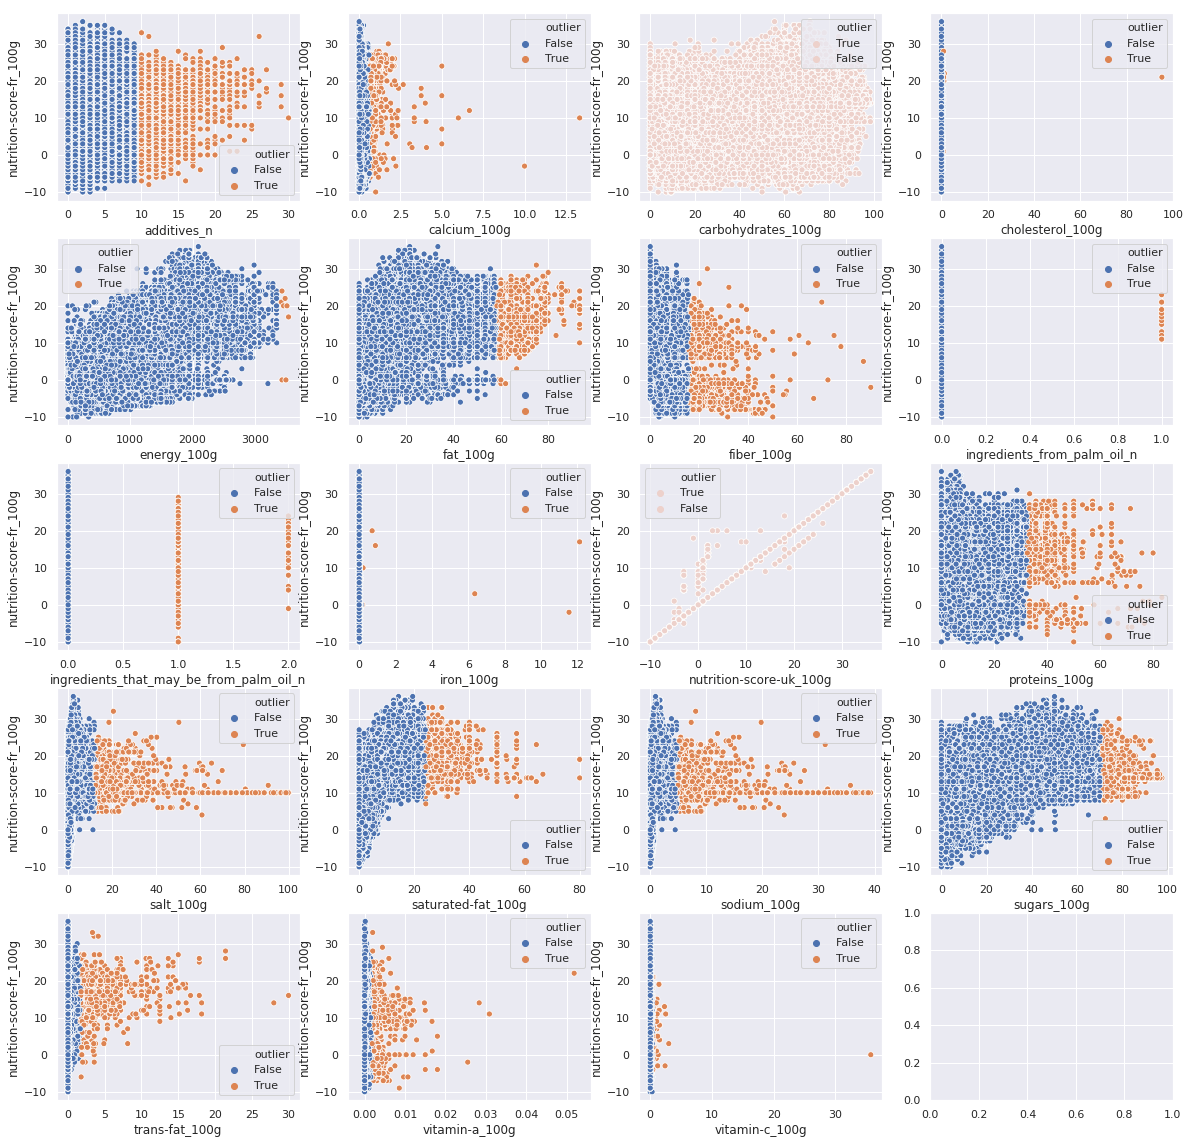

In [134]:
def data_hist(X, col, ncols=4,zlim=3, figsize=(20,20),hue='outlier'):
    x_cols = X.columns.difference([col])
    nlines = 1+(len(x_cols)//ncols)
    fig, axes = plt.subplots(nrows=nlines, ncols=ncols, figsize=figsize)
    for i, xcol in enumerate(x_cols):
        Y = X[[xcol,col]].copy()
        Y['outlier'] = ( np.abs((X - X.mean())/X.std()) > zlim)[xcol]
        sns.scatterplot(data=Y, x=xcol, y=col, ax=axes[i//ncols,i%ncols], hue=hue)
data_hist(df, 'nutrition-score-fr_100g',zlim=3, ncols=4, figsize=(20,20))

By analyzing the chart above, we can conclude that :
-  'cholesterol_100g', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
    'iron_100g' : these columns contains very few values different than 0. We can remove them.
- For other columns, some outliers must be droped manually : **['additives_n' > 25,
'calcium_100g'> 2,
'fiber_100g' > 50,
'saturated-fat_100g' > 60,
'sodium_100g' > 30,
'trans-fat_100g' > 20,
'vitamin-a_100g' > 0.01,
'vitamin-c_100g'> 0.75 ]**

In [135]:
df = df.drop(['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','cholesterol_100g', 'iron_100g'], axis=1)

In [136]:
outliers_limits = {
  'additives_n': 25,
 'calcium_100g': 2,
 'fiber_100g': 50,
 'saturated-fat_100g': 60,
 'sodium_100g': 30,
 'trans-fat_100g': 20,
  'vitamin-a_100g': 0.01,                   
  'vitamin-c_100g': 0.75
                  }
df = df[~(df[outliers_limits.keys()] > list(outliers_limits.values())).any(axis=1)]

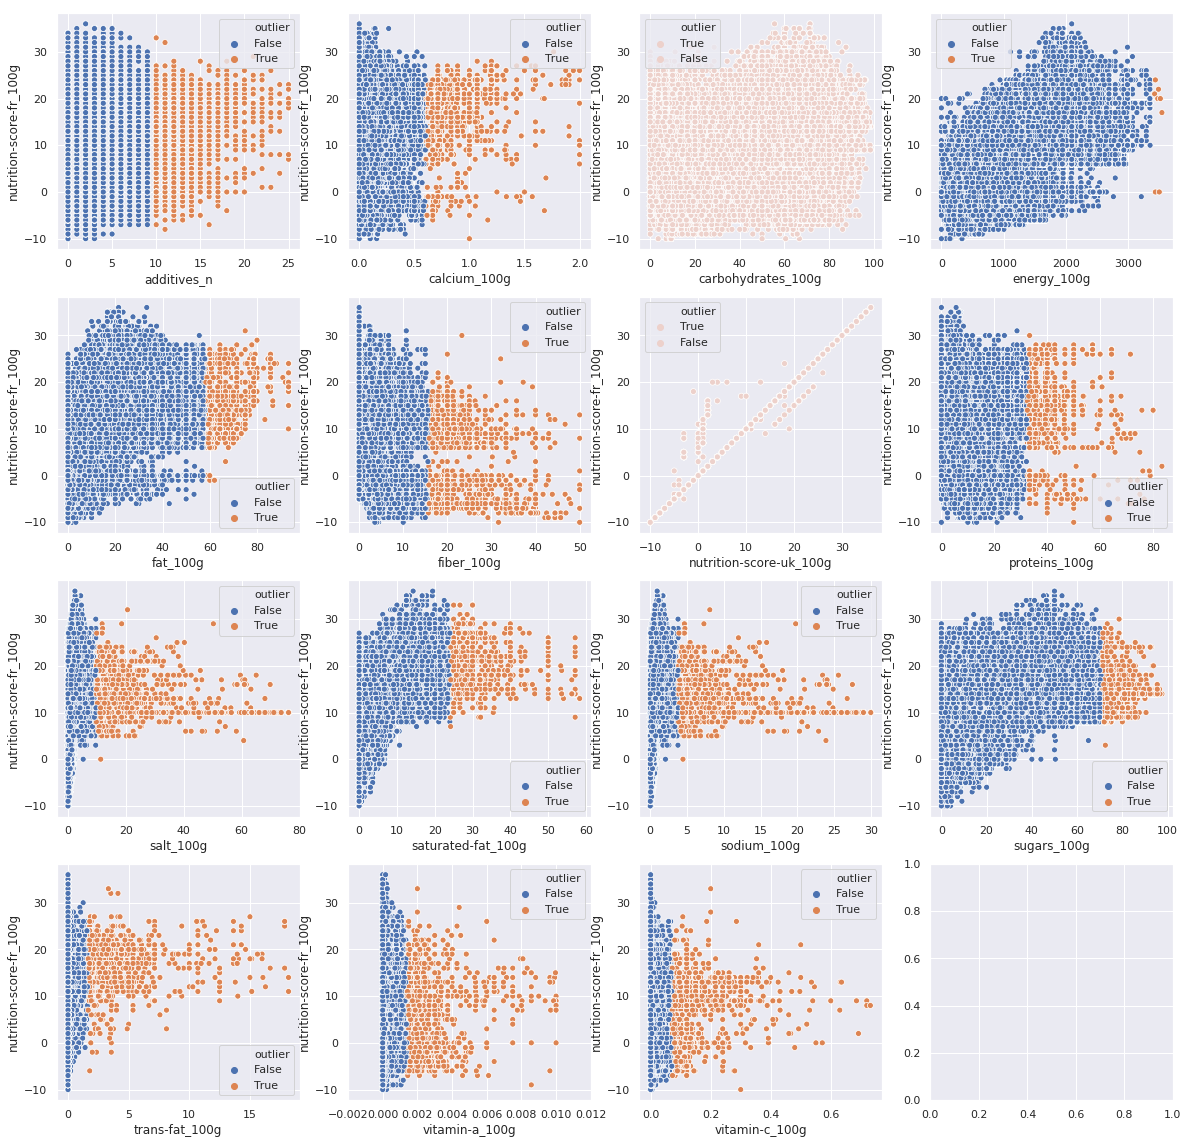

In [137]:
data_hist(df, 'nutrition-score-fr_100g',zlim=3, ncols=4, figsize=(20,20))

In [138]:
df.shape

(123239, 16)

This is the correlation matrix between each variable

In [139]:
df.corr()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
additives_n,1.000000,0.012678,-0.112545,-0.032046,0.041243,0.179194,0.166887,-0.164400,-0.124201,0.030042,0.030042,-0.058421,-0.029521,-0.032351,0.160245,0.159614
energy_100g,0.012678,1.000000,0.773012,0.551287,0.071818,0.566690,0.338064,0.319170,0.332497,0.005932,0.005932,-0.068646,-0.087204,0.143850,0.635650,0.636991
fat_100g,-0.112545,0.773012,1.000000,0.693325,0.068622,-0.038287,0.003493,0.173055,0.332185,-0.006121,-0.006121,-0.040836,-0.102869,0.224847,0.581634,0.582523
saturated-fat_100g,-0.032046,0.551287,0.693325,1.000000,0.032922,-0.015055,0.168860,-0.023465,0.235686,-0.024432,-0.024432,-0.011238,-0.116862,0.371356,0.694481,0.695178
trans-fat_100g,0.041243,0.071818,0.068622,0.032922,1.000000,0.033674,0.017886,-0.009234,-0.019705,0.009503,0.009503,-0.008283,-0.012375,-0.017997,0.072819,0.072899
carbohydrates_100g,0.179194,0.566690,-0.038287,-0.015055,0.033674,1.000000,0.620452,0.292023,-0.136483,-0.026704,-0.026704,-0.066559,0.003898,-0.173363,0.261314,0.262044
sugars_100g,0.166887,0.338064,0.003493,0.168860,0.017886,0.620452,1.000000,-0.027832,-0.277703,-0.109448,-0.109448,-0.062840,0.015786,-0.110296,0.482456,0.482393
fiber_100g,-0.164400,0.319170,0.173055,-0.023465,-0.009234,0.292023,-0.027832,1.000000,0.245477,-0.030930,-0.030928,0.063233,0.056259,-0.004259,-0.170571,-0.169782
proteins_100g,-0.124201,0.332497,0.332185,0.235686,-0.019705,-0.136483,-0.277703,0.245477,1.000000,0.082284,0.082284,0.003822,-0.073996,0.462009,0.127767,0.129032
salt_100g,0.030042,0.005932,-0.006121,-0.024432,0.009503,-0.026704,-0.109448,-0.030930,0.082284,1.000000,1.000000,0.112634,0.006477,0.056119,0.175357,0.175778


It can also be presented as a heatmap

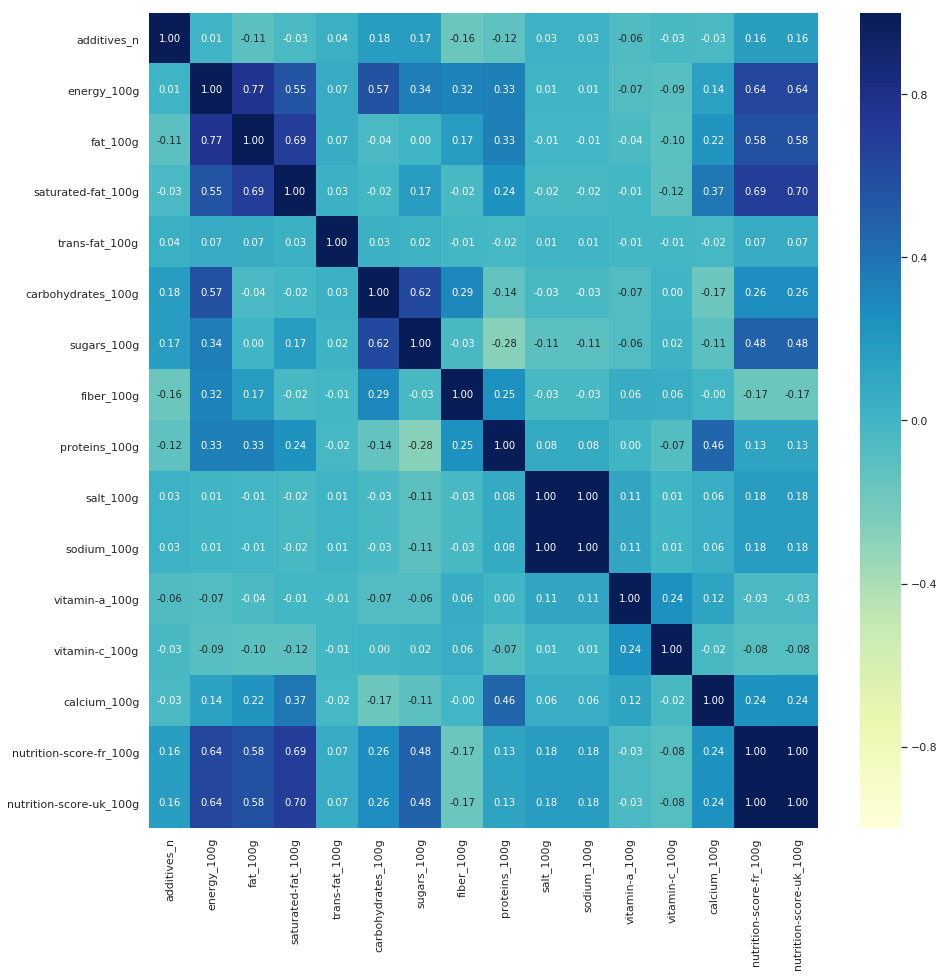

In [140]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, annot=True,fmt=".2f", cmap="YlGnBu");

The table bellow gives correlations between nutrition score and other variables

In [141]:
df.corr()[['nutrition-score-fr_100g','nutrition-score-uk_100g']].sort_values('nutrition-score-fr_100g', ascending=False)

,nutrition-score-fr_100g,nutrition-score-uk_100g
nutrition-score-fr_100g,1.000000,0.999276
nutrition-score-uk_100g,0.999276,1.000000
saturated-fat_100g,0.694481,0.695178
energy_100g,0.635650,0.636991
fat_100g,0.581634,0.582523
sugars_100g,0.482456,0.482393
carbohydrates_100g,0.261314,0.262044
calcium_100g,0.241863,0.242619
salt_100g,0.175357,0.175778
sodium_100g,0.175357,0.175778


Another way to have the same result :

In [142]:
df.corrwith(df['nutrition-score-fr_100g']).sort_values(ascending=False)

nutrition-score-fr_100g    1.000000
nutrition-score-uk_100g    0.999276
saturated-fat_100g         0.694481
energy_100g                0.635650
fat_100g                   0.581634
sugars_100g                0.482456
carbohydrates_100g         0.261314
calcium_100g               0.241863
salt_100g                  0.175357
sodium_100g                0.175357
additives_n                0.160245
proteins_100g              0.127767
trans-fat_100g             0.072819
vitamin-a_100g            -0.032098
vitamin-c_100g            -0.084353
fiber_100g                -0.170571
dtype: float64

If we apply np.log1p on columns which have negative correlation with nutrition score, we get a higher correlation for fiber_100g.

In [143]:
pd.concat([df.apply(np.log1p)[['vitamin-a_100g','vitamin-c_100g','fiber_100g']],df[['nutrition-score-uk_100g']]], axis=1).corrwith(df['nutrition-score-fr_100g']).sort_values(ascending=False)

nutrition-score-uk_100g    0.999276
vitamin-a_100g            -0.032103
vitamin-c_100g            -0.092618
fiber_100g                -0.214825
dtype: float64

Here is some insights about these data :
- The nutrition score is positivelly  correlated with energy and fats, specially with saturated ones.
- Carbohydrates and sugars are also positivelly correlated with nutrition score, but less than fats.
- There is no high negativelly correlated micronutriment with nutrition score. So, we cannot decrease the score by increasing a micronutriment quantity.
- A low negative correlation exists with fiber and vitamins a and c. When applying np.log1p, correlation becomes a bit more strong for fiber.

In conclusion :
- Increasing fats and carbohydrates in a product increases it's nutrition score. Products with high fat and carbohydrates are not healthy.
- To have lower nutrition scores, we have to decrease these micronutriments.